<a href="https://colab.research.google.com/github/Enri98/ams-project/blob/main/AMS_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

### Mount drive

In [137]:
# mount this drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
dataset_path = '/content/drive/My Drive/AMS/Dataset/ESS10.csv'

### Import Libraries

In [139]:
!pip install ipywidgets

In [140]:
!pip install miceforest

In [141]:
!pip install pingouin

In [142]:
!pip install polars

In [143]:
# libraries
import numpy as np
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import normaltest
from scipy.stats import chi2
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import miceforest as mf
from pingouin import multivariate_normality, box_m
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import ipywidgets as widgets
from IPython.display import display, clear_output
from tabulate import tabulate


In [144]:
# upload raw df
df_raw = pl.read_csv(dataset_path)
df_raw.describe()

statistic,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,prob,stratum,psu,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,prtvtebe,prtvtebg,prtvthch,…,hapdkc19,hapnac19,icvacc19,getavc19,getnvc19,vdcond,vdovexre,vdtype,vdtpsvre,vdtpitre,vdtpscre,vdtpaure,vdtpvire,vdtpoire,vdtpntre,vdtpapre,vdtprere,vdtpdkre,vdtpnare,inwds,ainws,ainwe,binwe,cinwe,dinwe,finwe,ginwe,hinwe,iinwe,kinwe,vinwe,inwde,jinws,jinwe,inwtm,mode,domain
str,str,f64,f64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64
"""count""","""37611""",37611.0,37611.0,"""37611""",37611.0,"""37611""",37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,1341.0,"""2718""","""1523""",…,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,37611.0,"""37600""","""37575""","""37575""","""37597""","""37592""","""36768""","""36654""","""36407""","""37557""","""36541""","""32077""","""33625""","""37570""","""36009""","""35979""",37224.0,37611.0,15217.0
"""null_count""","""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36270.0,"""34893""","""36088""",…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""11""","""36""","""36""","""14""","""19""","""843""","""957""","""1204""","""54""","""1070""","""5534""","""3986""","""41""","""1602""","""1632""",387.0,0.0,22394.0
"""mean""",null,10.0,3.0,null,30408.518758,null,1.0,1.0,0.70315,0.70315,0.001904,1484.1486,12616.202308,235.317992,4.070697,1971.636543,5.250193,5.951052,5.189811,2.749329,2.323017,2.152934,2.216719,2.189492,6.049081,6.58451,6.908458,4.803621,5.033714,9.722608,11.42461,26.116136,1.425859,28.517524,null,null,…,0.003084,0.080535,5.414639,2.924916,7.588179,1.27811,8.626492,5.730132,0.00444,0.003855,0.001781,0.004733,0.000612,0.001143,0.015474,0.937545,0.000053,0.000106,0.0339,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,52.652375,1.069129,1.586778
"""std""",null,0.0,0.0,null,21791.436583,null,0.444569,0.644318,1.010051,1.228341,0.003723,808.333732,6644.317622,1123.444891,1.500607,2916.422414,5.274939,6.605938,5.520771,0.952343,1.299813,1.319926,1.255443,1.347696,11.56921,10.867413,7.213369,9.83446,10.931258,19.817335,21.910559,37.141867,0.922063,31.901514,null,null,…,0.055451,0.272123,3.96428,2.221119,1.653003,0.614263,6.84529,1.091078,0.066488,0.061972,0.04217,0.068632,0.024722,0.033794,0.123431,0.241984,0.007292,0.010312,0.180973,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,25.272387,0.343445,0.492428
"""min""","""ESS10e03""",10.0,3.0,"""08.05.2023""",10002.0,"""BE""",0.042267,0.025635,0.033201,0.003017,0.000034,119.0,2004.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,"""1""","""1""",…,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""2020-09-18 10:18:44""","""2020-09-18 10:20:04""","""2020-09-18 10:25:21""","""2020-09-18 10:35:57""","""2020-09-18 10:44:27""","""2020-09-18 10:51:22""","""2020-09-18 11:01:21""","""2020-09-18 11:07:19""","""2020-09-18 11:11:36""","""2020-09-18 11:12:25""","""2021-05-05 10:40:51""","""2021-01-01 09:00:17""","""2020-09-18 11:21:51""","""2020-09-18 11:21:51""","""2020-09-18 11:22:51""",4.0,1.0,1.0
"""25%""",null,10.0,3.0,null,15847.0,null,0.8629544,0.627129,0.2174289,0.13471,0.000334,443.0,7684.0,30.0,3.0,120.0,3.0,4.0,3.0,2.0,1.0,1.0,1

### Import helpers


In [145]:
# copy file from here '/content/drive/My Drive/AMS/Dataset/anagrafica_variabili.py'

from anagrafica_variabili import *

#### Variables Anagrafica
Please refer to the file **`anagrafica_variabili.py`** for information regarding:


*   `vars_transcode` (dict): survey question that the variables refer to
*   `vars_to_use` (list): variables used in our analysis (some will be dropped later)
*    lists containing variables that have certain numbers as placeholders for NaN, specifically:
    * `list_7_8_9`
    * `list_77_88_99`
    * `list_9`
    * `list_999`
    * `list_55_77_88_99`
    * `list_66_77_88_99`
    * `list_6_7_8_9`




In [147]:
# vars_transcode
# vars_to_use

for i in vars_to_use:
  print(i, '---> ', vars_transcode[i])

cntry --->  Country
netusoft --->  Internet use, how often
ppltrst --->  Most people can be trusted or you can't be too careful
pplfair --->  Most people try to take advantage of you, or try to be fair
polintr --->  How interested in politics
trstprl --->  Trust in country's parliament
trstlgl --->  Trust in the legal system
trstplc --->  Trust in the police
trstplt --->  Trust in politicians
trstprt --->  Trust in political parties
trstep --->  Trust in the European Parliament
trstun --->  Trust in the United Nations
trstsci --->  Trust in scientists
vote --->  Voted last national election
lrscale --->  Placement on left right scale
stflife --->  How satisfied with life as a whole
stfeco --->  How satisfied with present state of economy in country
stfgov --->  How satisfied with the national government
happy --->  How happy are you
sclmeet --->  How often socially meet with friends, relatives or colleagues
ctzcntr --->  Citizen of country
accalaw --->  Acceptable for country to have a

In [148]:
len(df_raw['cntry'].unique())

22

## Data Cleaning

### Select variables of interest

In [149]:
df_raw = df_raw.select(vars_to_use)
df_raw.shape

(37611, 53)

### Switch placeholders with NaN

In [150]:
# function to change placeholders with NaN
def replace_placeholders_with_nan(df, columns, placeholders):
    # Create a dictionary to map placeholders to NaN
    placeholder_to_nan_map = {placeholder: None for placeholder in placeholders}

    # Replace placeholder values with NaN in the specified columns
    for column in columns:
        if column in df.columns:
            df = df.with_columns(
                pl.when(pl.col(column).is_in(placeholders))
                .then(pl.lit(None))
                .otherwise(pl.col(column))
                .alias(column))
        else:
            continue
    return df

In [151]:
df_raw = replace_placeholders_with_nan(df_raw,list_7_8_9,[7,8,9])
df_raw = replace_placeholders_with_nan(df_raw,list_77_88_99,[77,88,99])
df_raw = replace_placeholders_with_nan(df_raw,list_9,[9])
df_raw = replace_placeholders_with_nan(df_raw,list_999,[999])
df_raw = replace_placeholders_with_nan(df_raw,list_55_77_88_99,[55,77,88,99])
df_raw = replace_placeholders_with_nan(df_raw,list_66_77_88_99,[66,77,88,99])
df_raw = replace_placeholders_with_nan(df_raw,list_6_7_8_9,[6,7,8,9])

In [152]:
df_raw.describe()

statistic,cntry,netusoft,ppltrst,pplfair,polintr,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,lrscale,stflife,stfeco,stfgov,happy,sclmeet,ctzcntr,accalaw,hhmmb,gndr,agea,domicil,eduyrs,mnactic,hhlipnt,stfmjob,secgrdec,scidecpb,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""37611""",37537.0,37490.0,37399.0,37523.0,36903.0,36993.0,37347.0,37112.0,36988.0,35366.0,34804.0,29745.0,37152.0,32314.0,37255.0,36859.0,36772.0,37521.0,37468.0,37543.0,36261.0,37467.0,37611.0,37319.0,37555.0,36946.0,37438.0,21017.0,20593.0,31979.0,32318.0,37117.0,37129.0,37140.0,37062.0,37192.0,37113.0,36958.0,37056.0,37054.0,37074.0,37169.0,37178.0,37002.0,36920.0,37089.0,37066.0,36960.0,37180.0,37168.0,37165.0,37126.0
"""null_count""","""0""",74.0,121.0,212.0,88.0,708.0,618.0,264.0,499.0,623.0,2245.0,2807.0,7866.0,459.0,5297.0,356.0,752.0,839.0,90.0,143.0,68.0,1350.0,144.0,0.0,292.0,56.0,665.0,173.0,16594.0,17018.0,5632.0,5293.0,494.0,482.0,471.0,549.0,419.0,498.0,653.0,555.0,557.0,537.0,442.0,433.0,609.0,691.0,522.0,545.0,651.0,431.0,443.0,446.0,485.0
"""mean""",null,4.062951,4.988103,5.486243,2.737468,4.49202,5.228854,6.342303,3.702765,3.653536,4.772917,5.248362,7.057388,1.348622,5.216501,7.08219,4.788166,4.55991,7.241918,4.660804,1.047945,2.982102,2.546534,1.535694,50.851202,2.8679,13.056325,3.137774,1.767093,7.520128,3.128397,3.268983,2.615028,4.040804,2.106516,3.162296,2.326495,2.98704,3.229991,2.449266,2.688482,2.928009,2.239447,2.207999,3.124345,2.352465,3.786379,2.68432,3.137446,2.025175,2.211957,2.747666,3.002236
"""std""",null,1.491578,2.5348,2.335701,0.920813,2.68578,2.790984,2.539697,2.504224,2.452794,2.580612,2.607707,2.22465,0.605588,2.348016,2.111703,2.477584,2.606336,1.933552,1.615907,0.213653,3.212931,1.341311,0.498731,18.413088,1.214731,4.076657,2.570186,0.422693,1.915791,1.220266,1.167697,1.255231,1.357276,1.064098,1.38665,1.209456,1.33769,1.377116,1.105898,1.246192,1.319661,1.113343,1.017645,1.356078,1.165895,1.449395,1.234834,1.370725,0.99711,1.057807,1.347808,1.334634
"""min""","""BE""",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,15.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""25%""",null,3.0,3.0,4.0,2.0,2.0,3.0,5.0,2.0,2.0,3.0,4.0,6.0,1.0,4.0,6.0,3.0,3.0,6.0,4.0,1.0,0.0,2.0,1.0,36.0,2.0,11.0,1.0,2.0,7.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0
"""50%""",null,5.0,5.0,6.0,3.0,5.0,5.0,7.0,4.0,4.0,5.0,5.0,8.0,1.0,5.0,7.0,5.0,5.0,8.0,5.0,1.0,2.0,2.0,2.0,51.0,3.0,12.0,1.0,2.0,8.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0,3.0
"""75%""",null,5.0,7.0,7.0,3.0,7.0,7.0,8.0,6.0,5.0,7.0,7.0,9.0,2.0,7.0,9.0,7.0,7.0,8.0,6.0,1.0,5.0,3.0,2.0,66.0,4.0,16.0,6.0,2.0,9.0,4.0,4.0,3.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,4.0,3.0,3.0,4.0,4.0
"""max""","""SK""",5.0,10.0,10.0,4.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,3.0,10.0,10.0,10.0,10.0,10.0,7.0,2.0,10.0,13.0,2.0,90.0,5.0,65.0,9.0,2.0,10.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


### Reverse scales
Next step is rescaling some variables (`polintrs`, `accalaw`, `domicil`), such that we have low values for negative answers and high values for positive answers.

In [153]:
# func to reverse the scales of certain columns
def reverse_scale(df, column, max_value):
    df = df.with_columns(
        (max_value + 1 - pl.col(column)).alias(column)
    )
    return df


In [154]:
df_raw = reverse_scale(df_raw, 'polintr', 4)
# we recode also this cuz all other vars about democracy has democratic
# answers as high values, this the opposite (for now)
df_raw = reverse_scale(df_raw, 'accalaw', 10)
# reverse domicil so it's like "How big ur city?" with high value being very big
df_raw = reverse_scale(df_raw, 'domicil', 5)

In [155]:
# reverse human values like "how much this value describe u?"
human_values = [
    'ipcrtiv', # 7 8 9 -
    'imprich',
    'ipeqopt',
    'ipshabt',
    'impsafe',
    'impdiff',
    'ipfrule',
    'ipudrst',
    'ipmodst',
    'ipgdtim',
    'impfree',
    'iphlppl',
    'ipsuces',
    'ipstrgv',
    'ipadvnt',
    'ipbhprp',
    'iprspot',
    'iplylfr',
    'impenv',
    'imptrad',
    'impfun'
]

for val in human_values:
    df_raw = reverse_scale(df_raw, val, 6)

In [ ]:
trust_vars = [
    'ppltrst',
    'pplfair',
    'trstprl',
    'trstlgl',
    'trstplc',
    'trstplt',
    'trstprt',
    'trstep',
    'trstun',
    'trstsci']

### Binary vars recoding
We recode now some binary vars, that have values 1 or 2, to hold values 0 or 1

In [156]:
def recode_binary_vars(df, column):
    df = df.with_columns(
        pl.when(pl.col(column).eq(2)).then(pl.col(column) -2).otherwise(pl.col(column)).alias(column)
    )
    return df

In [157]:
binary_vars = ['ctzcntr', 'gndr', 'hhlipnt'] # gender: 1=M, 0=F

In [158]:
for c in binary_vars:
    df_raw = recode_binary_vars(df_raw, c)

df_raw.describe()

statistic,cntry,netusoft,ppltrst,pplfair,polintr,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,lrscale,stflife,stfeco,stfgov,happy,sclmeet,ctzcntr,accalaw,hhmmb,gndr,agea,domicil,eduyrs,mnactic,hhlipnt,stfmjob,secgrdec,scidecpb,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""37611""",37537.0,37490.0,37399.0,37523.0,36903.0,36993.0,37347.0,37112.0,36988.0,35366.0,34804.0,29745.0,37152.0,32314.0,37255.0,36859.0,36772.0,37521.0,37468.0,37543.0,36261.0,37467.0,37611.0,37319.0,37555.0,36946.0,37438.0,21017.0,20593.0,31979.0,32318.0,37117.0,37129.0,37140.0,37062.0,37192.0,37113.0,36958.0,37056.0,37054.0,37074.0,37169.0,37178.0,37002.0,36920.0,37089.0,37066.0,36960.0,37180.0,37168.0,37165.0,37126.0
"""null_count""","""0""",74.0,121.0,212.0,88.0,708.0,618.0,264.0,499.0,623.0,2245.0,2807.0,7866.0,459.0,5297.0,356.0,752.0,839.0,90.0,143.0,68.0,1350.0,144.0,0.0,292.0,56.0,665.0,173.0,16594.0,17018.0,5632.0,5293.0,494.0,482.0,471.0,549.0,419.0,498.0,653.0,555.0,557.0,537.0,442.0,433.0,609.0,691.0,522.0,545.0,651.0,431.0,443.0,446.0,485.0
"""mean""",null,4.062951,4.988103,5.486243,2.262532,4.49202,5.228854,6.342303,3.702765,3.653536,4.772917,5.248362,7.057388,1.348622,5.216501,7.08219,4.788166,4.55991,7.241918,4.660804,0.952055,8.017898,2.546534,0.464306,50.851202,3.1321,13.056325,3.137774,0.232907,7.520128,3.128397,3.268983,4.384972,2.959196,4.893484,3.837704,4.673505,4.01296,3.770009,4.550734,4.311518,4.071991,4.760553,4.792001,3.875655,4.647535,3.213621,4.31568,3.862554,4.974825,4.788043,4.252334,3.997764
"""std""",null,1.491578,2.5348,2.335701,0.920813,2.68578,2.790984,2.539697,2.504224,2.452794,2.580612,2.607707,2.22465,0.605588,2.348016,2.111703,2.477584,2.606336,1.933552,1.615907,0.213653,3.212931,1.341311,0.498731,18.413088,1.214731,4.076657,2.570186,0.422693,1.915791,1.220266,1.167697,1.255231,1.357276,1.064098,1.38665,1.209456,1.33769,1.377116,1.105898,1.246192,1.319661,1.113343,1.017645,1.356078,1.165895,1.449395,1.234834,1.370725,0.99711,1.057807,1.347808,1.334634
"""min""","""BE""",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""25%""",null,3.0,3.0,4.0,2.0,2.0,3.0,5.0,2.0,2.0,3.0,4.0,6.0,1.0,4.0,6.0,3.0,3.0,6.0,4.0,1.0,6.0,2.0,0.0,36.0,2.0,11.0,1.0,0.0,7.0,2.0,2.0,4.0,2.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0
"""50%""",null,5.0,5.0,6.0,2.0,5.0,5.0,7.0,4.0,4.0,5.0,5.0,8.0,1.0,5.0,7.0,5.0,5.0,8.0,5.0,1.0,9.0,2.0,0.0,51.0,3.0,12.0,1.0,0.0,8.0,3.0,3.0,5.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0
"""75%""",null,5.0,7.0,7.0,3.0,7.0,7.0,8.0,6.0,5.0,7.0,7.0,9.0,2.0,7.0,9.0,7.0,7.0,8.0,6.0,1.0,11.0,3.0,1.0,66.0,4.0,16.0,6.0,0.0,9.0,4.0,4.0,5.0,4.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,6.0,4.0,5.0,5.0,6.0,6.0,5.0,5.0
"""max""","""SK""",5.0,10.0,10.0,4.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,3.0,10.0,10.0,10.0,10.0,10.0,7.0,1.0,11.0,13.0,1.0,90.0,5.0,65.0,9.0,1.0,10.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


We drop the people not elegible to vote, we focus only on people who can vote and recode the variable to 0-1

In [159]:
# we drop the non voters (about 2k ppl) and recode to 0-1
df_raw = df_raw.filter(pl.col('vote') != 3)
df_raw = recode_binary_vars(df_raw, 'vote')

In [160]:
binary_vars.append('vote')

We could recode the main activities of last week (9 possible answers) to 8 0-1 dummies, but in the end we decided not to keep this variable.

In [161]:
# # encode the mnactic variable into 8 dummies (activities of last week)
# df_raw = df_raw.to_dummies(columns=['mnactic'])
# df_raw = df_raw.rename({
#         'mnactic_1':'lw_work',
#         'mnactic_2':'lw_educ',
#         'mnactic_3':'lw_jbser',
#         'mnactic_4':'lw_unemp',
#         'mnactic_5':'lw_disab',
#         'mnactic_6':'lw_retir',
#         'mnactic_7':'lw_milit',
#         'mnactic_8':'lw_housew'
#     }).drop('mnactic_9')        # drop last category (other) for the dummy trap

df_raw = df_raw.drop('mnactic')

Distribution Plots

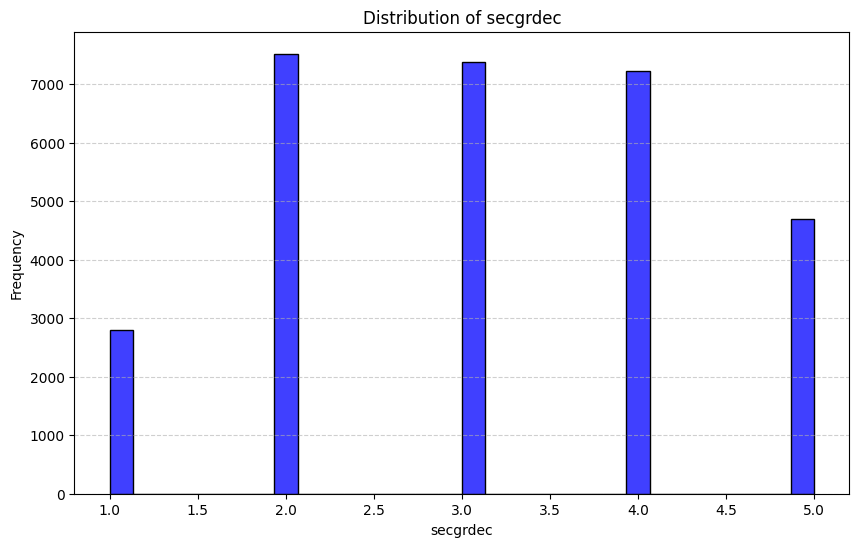

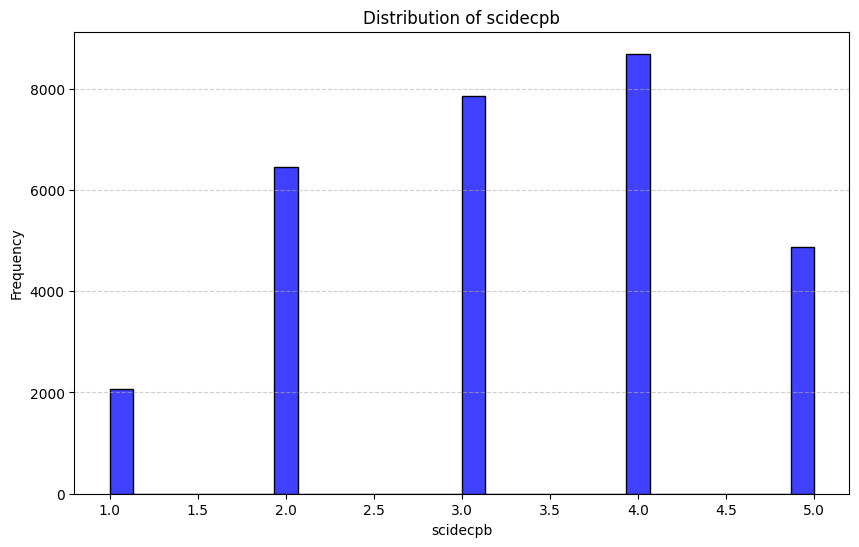

In [274]:
# Plot distributions for each dependent variable
dependent_variables = ['secgrdec', 'scidecpb']

for var in dependent_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_raw[var], color='blue', bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

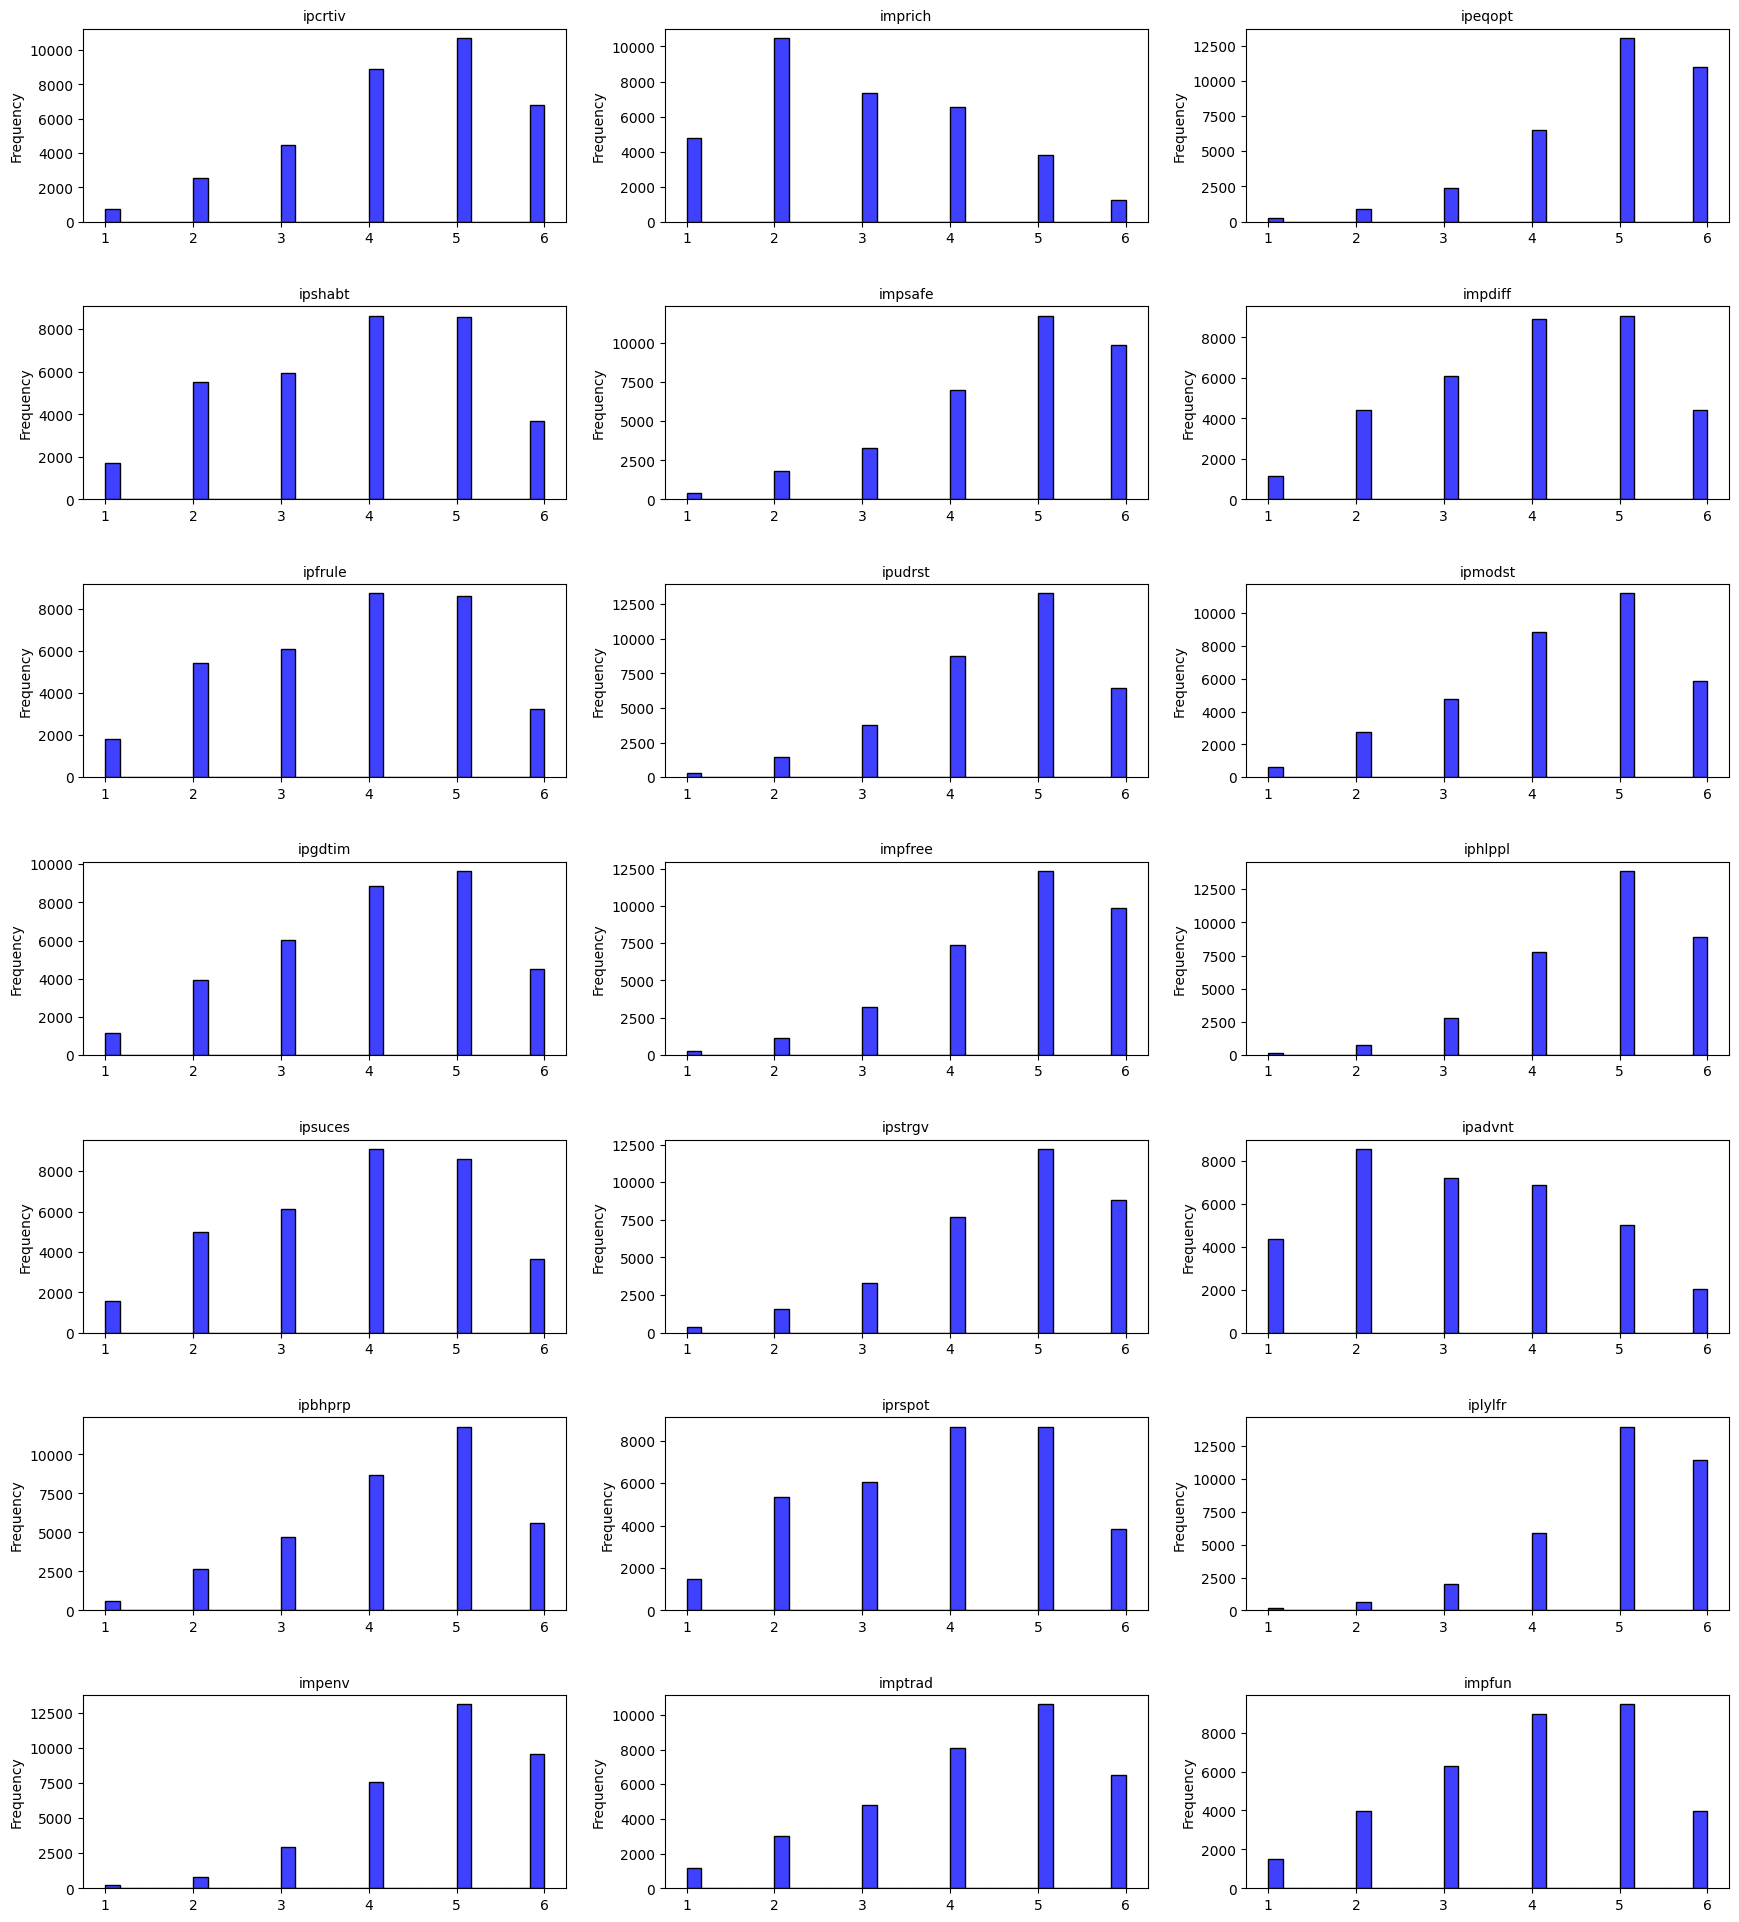

In [275]:
# rows and columns for the subplot grid
n_rows = 7
n_cols = 3

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))
fig.tight_layout(pad=4.0)

# Plot distributions for each variable in a loop
for i, var in enumerate(human_values):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df_raw[var], kde=False, color='blue', bins=30, ax=axes[row, col])
    axes[row, col].set_title(var, fontsize=10)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequency')


for i in range(len(human_values), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

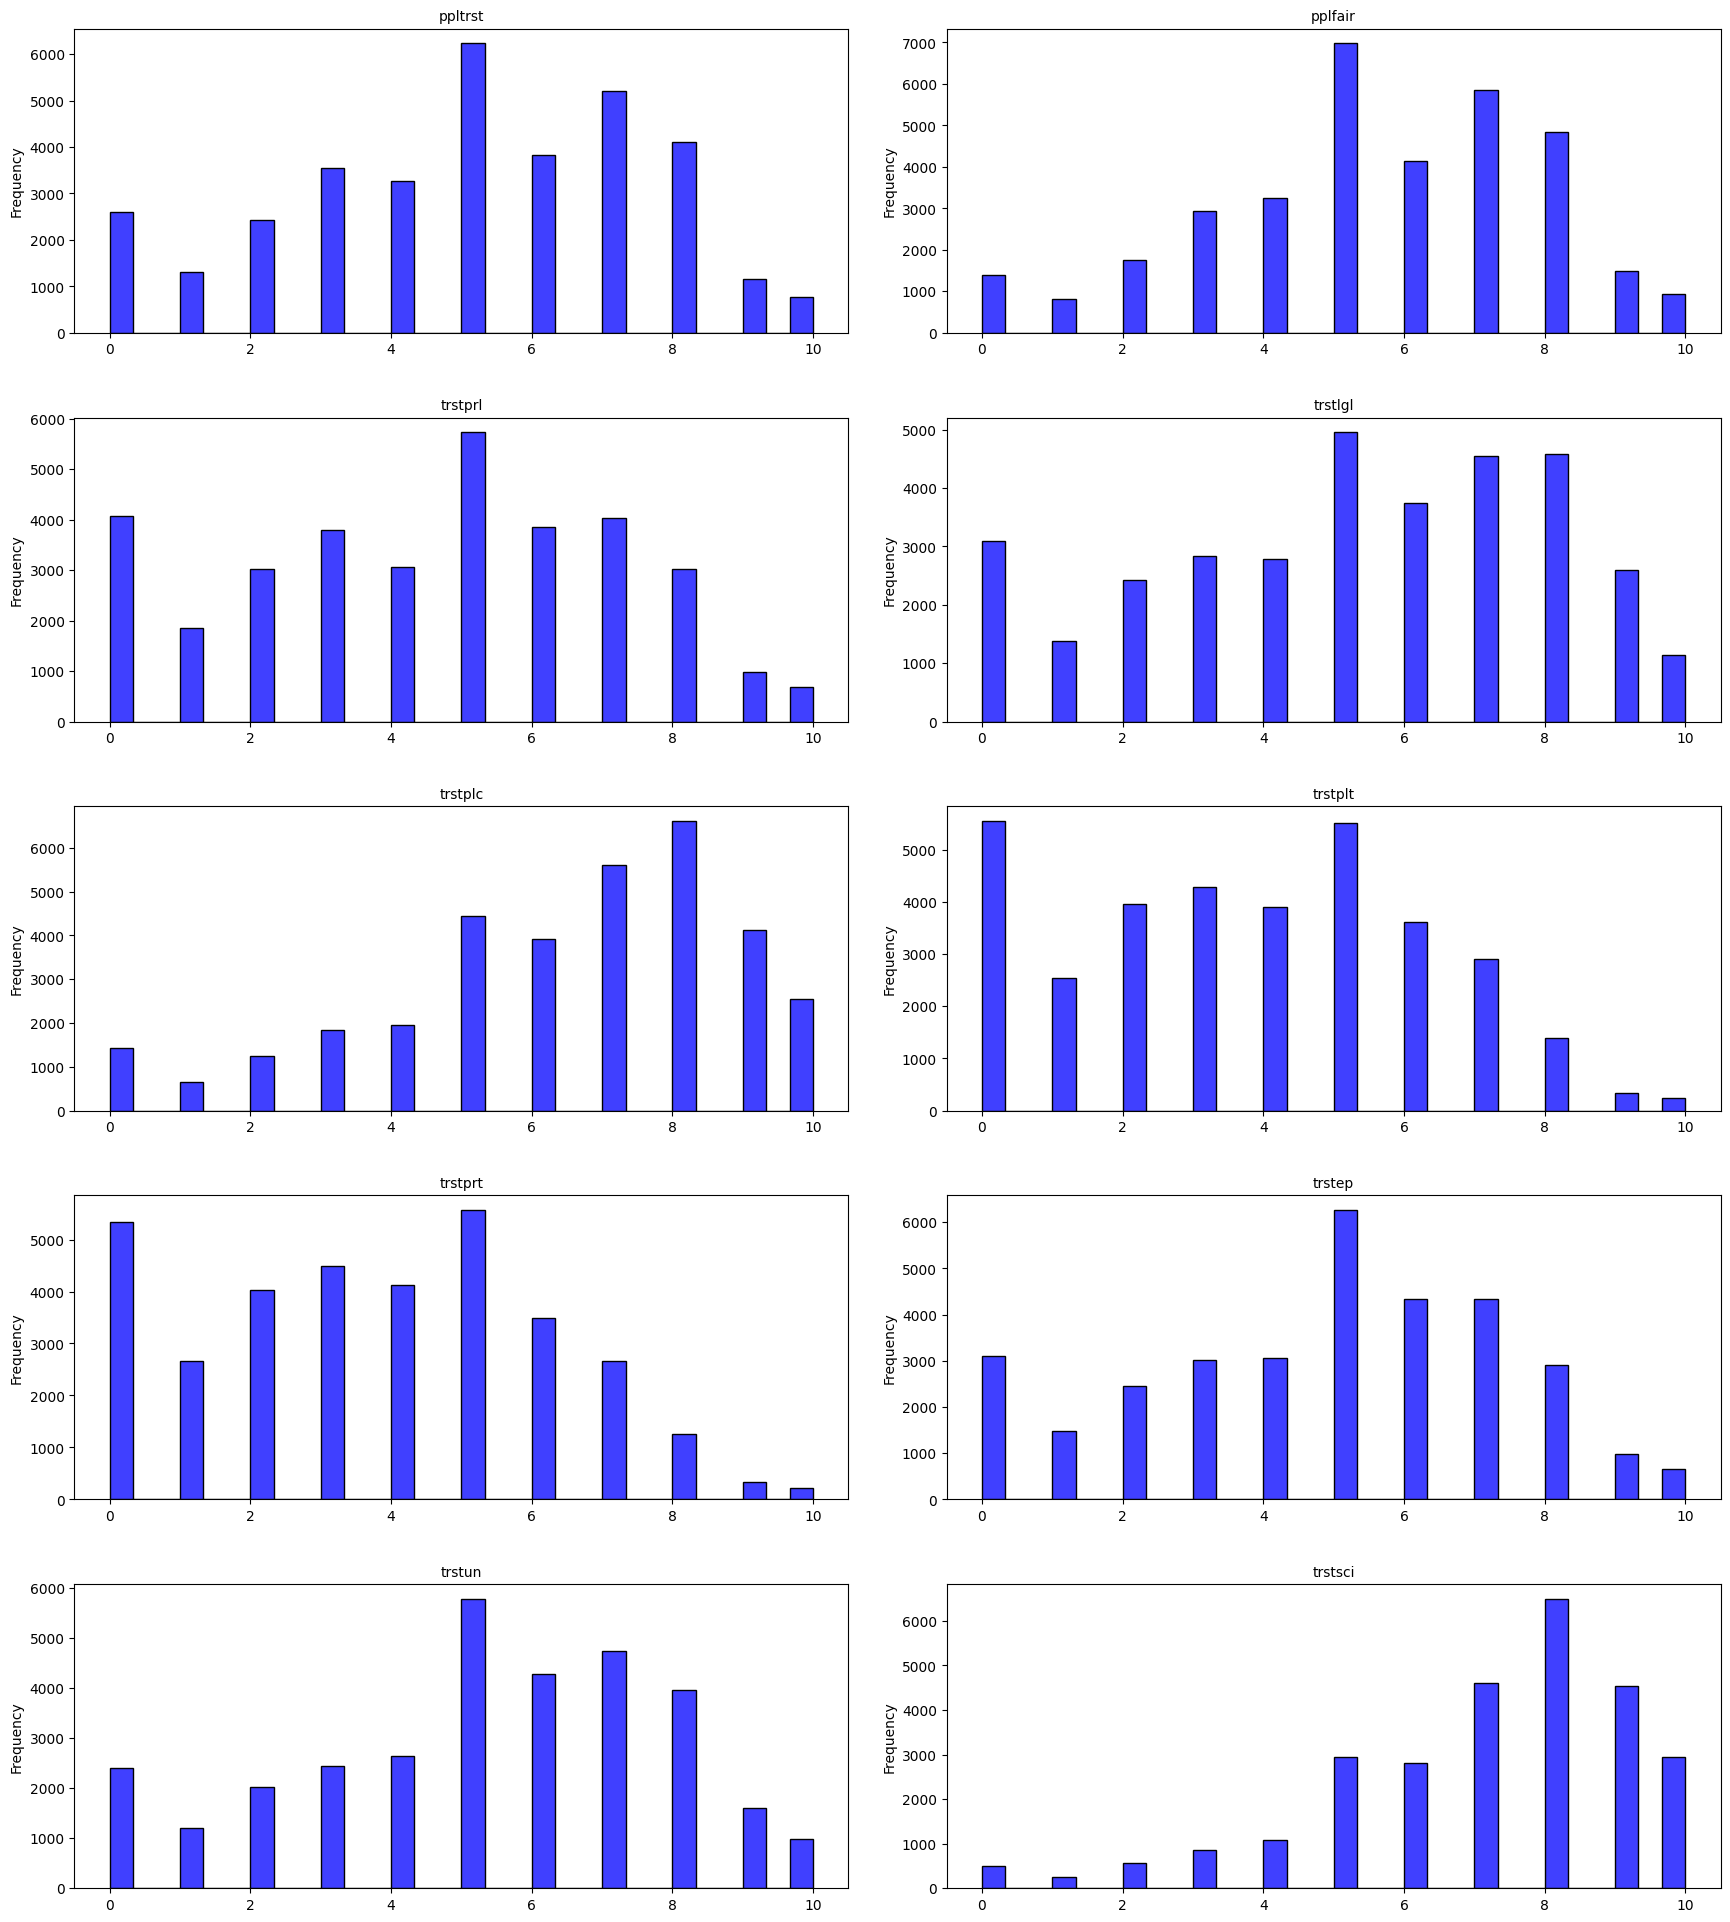

In [276]:
# rows and columns for the subplot grid
n_rows = 5
n_cols = 2

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))
fig.tight_layout(pad=4.0)

# Plot distributions for each variable in a loop
for i, var in enumerate(trust_vars):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df_raw[var], kde=False, color='blue', bins=30, ax=axes[row, col])
    axes[row, col].set_title(var, fontsize=10)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequency')


for i in range(len(trust_vars), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [277]:
for c in human_values + trust_vars:
  print(c, vars_transcode[c])

ipcrtiv Important to think new ideas and being creative
imprich Important to be rich, have money and expensive things
ipeqopt Important that people are treated equally and have equal opportunities
ipshabt Important to show abilities and be admired
impsafe Important to live in secure and safe surroundings
impdiff Important to try new and different things in life
ipfrule Important to do what is told and follow rules
ipudrst Important to understand different people
ipmodst Important to be humble and modest, not draw attention
ipgdtim Important to have a good time
impfree Important to make own decisions and be free
iphlppl Important to help people and care for others well-being
ipsuces Important to be successful and that people recognise achievements
ipstrgv Important that government is strong and ensures safety
ipadvnt Important to seek adventures and have an exciting life
ipbhprp Important to behave properly
iprspot Important to get respect from others
iplylfr Important to be loyal to fr

## NA Handling

First let's plot the proportion of NA for each column

In [162]:
# Calculate the proportion of missing data for each column and plot it
missing_data = df_raw.select([
    (pl.col(col).is_null().sum() / pl.len()).alias(col)
    for col in df_raw.columns
]).unpivot().rename({'variable':'var', 'value':'proportion_missing'})


fig = px.bar(
    missing_data,
    x='var',
    y='proportion_missing',
    title='Proportion of Missing Data by Variable',
    labels={'proportion_missing': 'Proportion of Missing Data'})
fig.show()

Columns `pdjobev`, `hhlipnt`, `stfmjob` have more than 40% of NA. At this point we decide to just drop them

In [163]:
for c in ['hhlipnt', 'stfmjob']:
    print(c, '=', vars_transcode[c])

hhlipnt = Parent lives in same household
stfmjob = How satisfied are you in your main job


In [164]:
# drop these columns
df_raw = df_raw.drop(['hhlipnt', 'stfmjob'])

In [165]:
for column in df_raw.columns:
  try:
    print(column, '=', vars_transcode[column])
  except:
    pass

cntry = Country
netusoft = Internet use, how often
ppltrst = Most people can be trusted or you can't be too careful
pplfair = Most people try to take advantage of you, or try to be fair
polintr = How interested in politics
trstprl = Trust in country's parliament
trstlgl = Trust in the legal system
trstplc = Trust in the police
trstplt = Trust in politicians
trstprt = Trust in political parties
trstep = Trust in the European Parliament
trstun = Trust in the United Nations
trstsci = Trust in scientists
vote = Voted last national election
lrscale = Placement on left right scale
stflife = How satisfied with life as a whole
stfeco = How satisfied with present state of economy in country
stfgov = How satisfied with the national government
happy = How happy are you
sclmeet = How often socially meet with friends, relatives or colleagues
ctzcntr = Citizen of country
accalaw = Acceptable for country to have a strong leader above the law
hhmmb = Number of people living regularly as member of hous

In [166]:
df_raw.describe()

statistic,cntry,netusoft,ppltrst,pplfair,polintr,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,lrscale,stflife,stfeco,stfgov,happy,sclmeet,ctzcntr,accalaw,hhmmb,gndr,agea,domicil,eduyrs,secgrdec,scidecpb,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""34558""",34500.0,34459.0,34378.0,34494.0,34101.0,34104.0,34362.0,34258.0,34164.0,32642.0,32096.0,27617.0,34558.0,30053.0,34257.0,34013.0,33958.0,34480.0,34434.0,34515.0,33446.0,34434.0,34558.0,34298.0,34510.0,33973.0,29618.0,29926.0,34128.0,34147.0,34147.0,34086.0,34193.0,34122.0,33984.0,34076.0,34089.0,34093.0,34181.0,34181.0,34032.0,33987.0,34106.0,34092.0,33996.0,34188.0,34176.0,34182.0,34140.0
"""null_count""","""0""",58.0,99.0,180.0,64.0,457.0,454.0,196.0,300.0,394.0,1916.0,2462.0,6941.0,0.0,4505.0,301.0,545.0,600.0,78.0,124.0,43.0,1112.0,124.0,0.0,260.0,48.0,585.0,4940.0,4632.0,430.0,411.0,411.0,472.0,365.0,436.0,574.0,482.0,469.0,465.0,377.0,377.0,526.0,571.0,452.0,466.0,562.0,370.0,382.0,376.0,418.0
"""mean""",null,4.020348,4.973534,5.477369,2.286572,4.43638,5.171886,6.312613,3.654212,3.608067,4.723761,5.203296,7.040012,0.775334,5.234752,7.054938,4.727751,4.507745,7.223318,4.612737,0.976155,7.996532,2.485247,0.462064,52.47548,3.129238,13.126777,3.117158,3.262882,4.372978,2.933698,4.881307,3.816992,4.681631,3.98479,3.786135,4.540938,4.312007,4.038483,4.751938,4.785904,3.8559,4.65169,3.169178,4.322832,3.857719,4.963554,4.791608,4.274033,3.96403
"""std""",null,1.515619,2.552063,2.344944,0.920211,2.686052,2.802088,2.547965,2.49565,2.446345,2.574464,2.6057,2.232703,0.417368,2.364769,2.117647,2.477696,2.613952,1.93396,1.613433,0.152567,3.234816,1.310272,0.498566,17.493509,1.217746,4.109472,1.223117,1.168207,1.260434,1.348489,1.067509,1.388424,1.205395,1.338878,1.376246,1.106585,1.245262,1.321461,1.116131,1.019891,1.356058,1.165632,1.438143,1.231604,1.373127,1.001397,1.054725,1.340706,1.335926
"""min""","""BE""",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""25%""",null,3.0,3.0,4.0,2.0,2.0,3.0,5.0,2.0,2.0,3.0,3.0,6.0,1.0,4.0,6.0,3.0,3.0,6.0,4.0,1.0,6.0,2.0,0.0,39.0,2.0,11.0,2.0,2.0,4.0,2.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0
"""50%""",null,5.0,5.0,6.0,2.0,5.0,5.0,7.0,4.0,4.0,5.0,5.0,8.0,1.0,5.0,7.0,5.0,5.0,8.0,5.0,1.0,9.0,2.0,0.0,53.0,3.0,13.0,3.0,3.0,5.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0
"""75%""",null,5.0,7.0,7.0,3.0,7.0,7.0,8.0,5.0,5.0,7.0,7.0,9.0,1.0,7.0,8.0,7.0,7.0,8.0,6.0,1.0,11.0,3.0,1.0,66.0,4.0,16.0,4.0,4.0,5.0,4.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,6.0,4.0,5.0,5.0,6.0,6.0,5.0,5.0
"""max""","""SK""",5.0,10.0,10.0,4.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,10.0,10.0,10.0,10.0,10.0,7.0,1.0,11.0,12.0,1.0,90.0,5.0,65.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


### Easy approach: drop NA

Dropping all rows with missing values we almost split the size of the dataframe: going from 34k observation to around 18k.

In [167]:
df = df_raw.drop_nulls()
df.describe()


statistic,cntry,netusoft,ppltrst,pplfair,polintr,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,lrscale,stflife,stfeco,stfgov,happy,sclmeet,ctzcntr,accalaw,hhmmb,gndr,agea,domicil,eduyrs,secgrdec,scidecpb,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""19436""",19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0,19436.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,4.188105,5.19114,5.668605,2.454157,4.63902,5.385213,6.424316,3.843538,3.833865,4.887631,5.3759,7.161916,0.831344,5.239761,7.189648,4.840965,4.629399,7.354703,4.675756,0.979111,8.133001,2.517545,0.489144,51.945153,3.170251,13.596625,3.162842,3.339679,4.458839,2.919737,4.960794,3.896841,4.669325,4.060198,3.80639,4.627084,4.309735,4.079183,4.844412,4.88264,3.963367,4.656359,3.258644,4.330315,3.877444,5.036119,4.847602,4.267133,4.118491
"""std""",null,1.413891,2.486298,2.259684,0.901365,2.661712,2.76857,2.467318,2.475828,2.419909,2.465638,2.498301,2.127109,0.374458,2.339059,2.023619,2.463371,2.611679,1.840385,1.578682,0.143017,3.193665,1.288149,0.499895,17.113477,1.234519,4.092848,1.227873,1.166452,1.211217,1.307334,1.002393,1.367004,1.193666,1.299494,1.356922,1.056254,1.227743,1.281784,1.057822,0.95511,1.311757,1.144102,1.409746,1.219247,1.343041,0.941419,1.010177,1.318586,1.25896
"""min""","""BE""",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""25%""",null,4.0,3.0,4.0,2.0,3.0,3.0,5.0,2.0,2.0,3.0,4.0,6.0,1.0,4.0,6.0,3.0,3.0,7.0,4.0,1.0,6.0,2.0,0.0,38.0,2.0,11.0,2.0,2.0,4.0,2.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,5.0,4.0,3.0,3.0
"""50%""",null,5.0,5.0,6.0,3.0,5.0,6.0,7.0,4.0,4.0,5.0,6.0,8.0,1.0,5.0,8.0,5.0,5.0,8.0,5.0,1.0,9.0,2.0,0.0,52.0,3.0,13.0,3.0,3.0,5.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0
"""75%""",null,5.0,7.0,7.0,3.0,7.0,8.0,8.0,6.0,6.0,7.0,7.0,9.0,1.0,7.0,9.0,7.0,7.0,9.0,6.0,1.0,11.0,3.0,1.0,66.0,4.0,16.0,4.0,4.0,5.0,4.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,4.0,5.0,5.0,6.0,6.0,5.0,5.0
"""max""","""SK""",5.0,10.0,10.0,4.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,10.0,10.0,10.0,10.0,10.0,7.0,1.0,11.0,11.0,1.0,90.0,5.0,65.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


### Multiple Imputation (MICE) approach

For this approach, we use the Multiple Imputation Chain Equation to compute 5 dataframes, that we then aggregate (the imputed NaN values) with averaging.

In [168]:
df_pd = df_raw.to_pandas()

In [169]:
# Convert cntry into categorical and then to integer codes so we can run MICE forest
df_pd['cntry'] = df_pd['cntry'].astype('category')   # Convert to categorical
cntry_categories = df_pd['cntry'].cat.categories     # Store the original categories
df_pd['cntry_code'] = df_pd['cntry'].cat.codes       # Replace with integer codes
df_pd = df_pd.drop(columns=['cntry'])                 # Drop the original column


In [170]:
# df_pd.describe()

In [171]:
# Initialize the kernel with the pandas DataFrame
kernel = mf.ImputationKernel(
    data=df_pd,
    num_datasets=5,
    save_all_iterations_data=False,   # set to true only if u wanna waste lot of RAM
    random_state=33
)

In [172]:
kernel.mice(5)

In [173]:
print(kernel)


              Class: ImputationKernel
            Datasets: 5
          Iterations: 5
        Data Samples: 34558
        Data Columns: 50
   Imputed Variables: 47
   Modeled Variables: 47
All Iterations Saved: False
        


In [174]:
imputed_dfs = [kernel.complete_data(i) for i in kernel.datasets]


In [175]:
binary_vars
# since gender and vote, the only 2 binary var remaining, have no NA
# we may not exclude them from the mean when combining the 5 dfs
# we just round the ctzcntr one

['ctzcntr', 'gndr', 'hhlipnt', 'vote']

Combine the 5 imputed dataframes back to one by taking the mean

In [176]:
non_cntry = [col for col in imputed_dfs[0].columns.to_list()]

# Compute the mean of each value across the 5 datasets
df_mice = pd.concat(imputed_dfs)[non_cntry].groupby(level=0).mean()

In [177]:
# add back the country information
df_mice['cntry'] = df_mice['cntry_code'].astype(int).apply(lambda x: cntry_categories[x])
df_mice.drop(columns=['cntry_code'], inplace=True)
df_mice['ctzcntr'] = df_mice['ctzcntr'].round()

In [178]:
df_mice_non_std = df_mice
df_mice.describe()

,netusoft,ppltrst,pplfair,polintr,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
count,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,...,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000
mean,4.020470,4.972516,5.475109,2.286544,4.433549,5.168378,6.310516,3.655183,3.609821,4.726477,...,4.784125,3.853533,4.648498,3.166555,4.320534,3.855107,4.961410,4.788911,4.273870,3.960982
std,1.515197,2.550492,2.342287,0.919740,2.678247,2.794184,2.545173,2.490696,2.439506,2.537015,...,1.016904,1.349834,1.160665,1.432362,1.227003,1.366383,0.999176,1.051720,1.335998,1.331512
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,5.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000
50%,5.000000,5.000000,6.000000,2.000000,5.000000,5.000000,7.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,3.000000,5.000000,4.000000,5.000000,5.000000,4.600000,4.000000
75%,5.000000,7.000000,7.000000,3.000000,7.000000,7.000000,8.000000,5.000000,5.000000,7.000000,...,6.000000,5.000000,6.000000,4.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000
max,5.000000,10.000000,10.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


## Standardization

#### NA-dropped DF

In [179]:
cols_to_standardize = []
for c in df.columns:
    if df[c].dtype != 'object':

      if c not in [  # columns not to standardize
          'cntry',
          'vote',
          'ctzcntr',
          'gndr']:

          cols_to_standardize.append(c)

Keep a DF non standardized

In [180]:
df_non_std = df_pd.dropna().reset_index(drop=True)
df_non_std['cntry'] = df_non_std['cntry_code'].astype(int).apply(lambda x: cntry_categories[x])
df_non_std.drop(columns=['cntry_code'], inplace=True)

In [181]:

df = df.to_pandas()

# Compute means and stds
df_means = df[cols_to_standardize].mean()
df_stds = df[cols_to_standardize].std()

# Apply z-score standardization to the dataset using the mean/std
df[cols_to_standardize] = (df[cols_to_standardize] - df_means) / df_stds

In [182]:
df.describe()

,netusoft,ppltrst,pplfair,polintr,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
count,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,...,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04,1.943600e+04
mean,-1.667048e-16,-4.679434e-17,2.047252e-17,-7.311615e-18,-3.802040e-17,1.286844e-16,2.339717e-17,-4.679434e-17,-9.066402e-17,6.141757e-17,...,3.436459e-16,-1.052873e-16,-3.070878e-16,4.533201e-17,1.901020e-17,4.386969e-17,9.943796e-17,1.111365e-16,-2.485949e-16,1.930266e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.254844e+00,-2.087899e+00,-2.508582e+00,-1.613283e+00,-1.742871e+00,-1.945124e+00,-2.603764e+00,-1.552425e+00,-1.584301e+00,-1.982299e+00,...,-4.065122e+00,-2.259083e+00,-3.195833e+00,-1.602164e+00,-2.731451e+00,-2.142484e+00,-4.287272e+00,-3.808839e+00,-2.477755e+00,-2.477037e+00
25%,-1.330403e-01,-8.812862e-01,-7.384238e-01,-5.038547e-01,-6.157767e-01,-8.615324e-01,-5.772728e-01,-7.446146e-01,-7.578240e-01,-7.655751e-01,...,-9.241241e-01,-7.344097e-01,-5.736895e-01,-8.928160e-01,-2.709170e-01,-6.533261e-01,-3.836607e-02,-8.390631e-01,-9.609786e-01,-8.884246e-01
50%,5.742276e-01,-7.687741e-02,1.466556e-01,6.055732e-01,1.356193e-01,2.220594e-01,2.333239e-01,6.319592e-02,6.865342e-02,4.557392e-02,...,1.228754e-01,2.792671e-02,3.003584e-01,-1.834684e-01,5.492610e-01,9.125266e-02,-3.836607e-02,1.508623e-01,5.557974e-01,-9.411849e-02
75%,5.742276e-01,7.275314e-01,5.891953e-01,6.055732e-01,8.870154e-01,9.444539e-01,6.386222e-01,8.710065e-01,8.951309e-01,8.567229e-01,...,1.169875e+00,7.902632e-01,3.003584e-01,5.258793e-01,5.492610e-01,8.358314e-01,1.023860e+00,1.140788e+00,5.557974e-01,7.001876e-01
max,5.742276e-01,1.934145e+00,1.916814e+00,1.715001e+00,2.014109e+00,1.666848e+00,1.449219e+00,2.486628e+00,2.548086e+00,2.073446e+00,...,1.169875e+00,1.552600e+00,1.174406e+00,1.944575e+00,1.369439e+00,1.580410e+00,1.023860e+00,1.140788e+00,1.314185e+00,1.494494e+00


#### MICE DF

In [183]:
# Compute means and stds
df_means_mice = df_mice[cols_to_standardize].mean()
df_stds_mice = df_mice[cols_to_standardize].std()

# Apply z-score standardization to the dataset using the mean/std
df_mice[cols_to_standardize] = (df_mice[cols_to_standardize] - df_means_mice) / df_stds_mice

## Normality Test

### D’Agostino-Pearson’s K² Test

#### NA-dropped DF

In [184]:
vars_to_test = []
for c in df.columns:
  if c not in binary_vars and c not in ['cntry']:
    vars_to_test.append(c)

In [185]:
results = pd.DataFrame(columns=['Variable', 'Stat', 'p-value', 'Normal?'])


# Loop through the variables and perform D’Agostino-Pearson’s K² Test
for var in vars_to_test:
    # Drop NA values from the variable
    data = df_raw.drop_nulls()[var].to_numpy()

    # Perform the D’Agostino-Pearson test
    stat, p = stats.normaltest(data)

    # Determine if the variable is normally distributed (p > 0.05 means normal)
    normal = 'Yes' if p > 0.05 else 'No'

    # Append the results
    results = pd.concat([results, pd.DataFrame({
        'Variable': [var],
        'Stat': [stat],
        'p-value': [p],
        'Normal?': [normal]
    })], ignore_index=True)


<ipython-input-185-57aa76990cb3>:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [186]:
from tabulate import tabulate
# print("\n=== D’Agostino-Pearson’s K² Test Results ===\n")
# print(results)

print("\n=== D’Agostino-Pearson’s K² Test Results (Tabulate) ===\n")
print(tabulate(results, headers='keys', tablefmt='pretty'))


=== D’Agostino-Pearson’s K² Test Results (Tabulate) ===

+----+----------+--------------------+-------------------------+---------+
|    | Variable |        Stat        |         p-value         | Normal? |
+----+----------+--------------------+-------------------------+---------+
| 0  | netusoft | 4093.9799068073266 |           0.0           |   No    |
| 1  | ppltrst  |  991.562972809126  | 4.839898174355084e-216  |   No    |
| 2  | pplfair  | 643.6816616224082  | 1.6838489387431837e-140 |   No    |
| 3  | polintr  | 1630.0400628219234 |           0.0           |   No    |
| 4  | trstprl  | 2600.027830980785  |           0.0           |   No    |
| 5  | trstlgl  | 2272.0721812062493 |           0.0           |   No    |
| 6  | trstplc  | 1591.428520563062  |           0.0           |   No    |
| 7  | trstplt  | 2825.3667514977715 |           0.0           |   No    |
| 8  | trstprt  | 2043.3217437003655 |           0.0           |   No    |
| 9  |  trstep  | 873.8949366236658  | 1.7

#### MICE DF

In [187]:
results = pd.DataFrame(columns=['Variable', 'Stat', 'p-value', 'Normal?'])


# Loop through the variables and perform D’Agostino-Pearson’s K² Test
for var in vars_to_test:
    # Drop NA values from the variable
    data = df_mice_non_std[var].to_numpy()

    # Perform the D’Agostino-Pearson test
    stat, p = stats.normaltest(data)

    # Determine if the variable is normally distributed (p > 0.05 means normal)
    normal = 'Yes' if p > 0.05 else 'No'

    # Append the results
    results = pd.concat([results, pd.DataFrame({
        'Variable': [var],
        'Stat': [stat],
        'p-value': [p],
        'Normal?': [normal]
    })], ignore_index=True)

<ipython-input-187-835b844c9f30>:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [188]:
print("\n=== D’Agostino-Pearson’s K² Test Results (Tabulate) ===\n")
print(tabulate(results, headers='keys', tablefmt='pretty'))


=== D’Agostino-Pearson’s K² Test Results (Tabulate) ===

+----+----------+--------------------+-----------------------+---------+
|    | Variable |        Stat        |        p-value        | Normal? |
+----+----------+--------------------+-----------------------+---------+
| 0  | netusoft | 5394.745493815611  |          0.0          |   No    |
| 1  | ppltrst  | 2095.204369254999  |          0.0          |   No    |
| 2  | pplfair  | 1056.102979630146  | 4.67898671948893e-230 |   No    |
| 3  | polintr  | 4290.156945852903  |          0.0          |   No    |
| 4  | trstprl  | 4668.598216796832  |          0.0          |   No    |
| 5  | trstlgl  | 4571.640992008918  |          0.0          |   No    |
| 6  | trstplc  | 2503.8275036906643 |          0.0          |   No    |
| 7  | trstplt  | 4378.017173102108  |          0.0          |   No    |
| 8  | trstprt  | 3426.1116247654145 |          0.0          |   No    |
| 9  |  trstep  | 1806.7835773647944 |          0.0          |   N

In [189]:
# for column in df.columns:
#   try:
#     print(column, '=', vars_transcode[column])
#   except:
#     pass

## Correlation
Let's focus forn now on the correlations among Human values, trust variables and the 2 dependent variables.
This is a preliminary step before performing PCA on these subsets.

In [190]:
trust_vars = [
    'ppltrst',
    'pplfair',
    'trstprl',
    'trstlgl',
    'trstplc',
    'trstplt',
    'trstprt',
    'trstep',
    'trstun',
    'trstsci']

y_vars = ['secgrdec', 'scidecpb']

Human Values

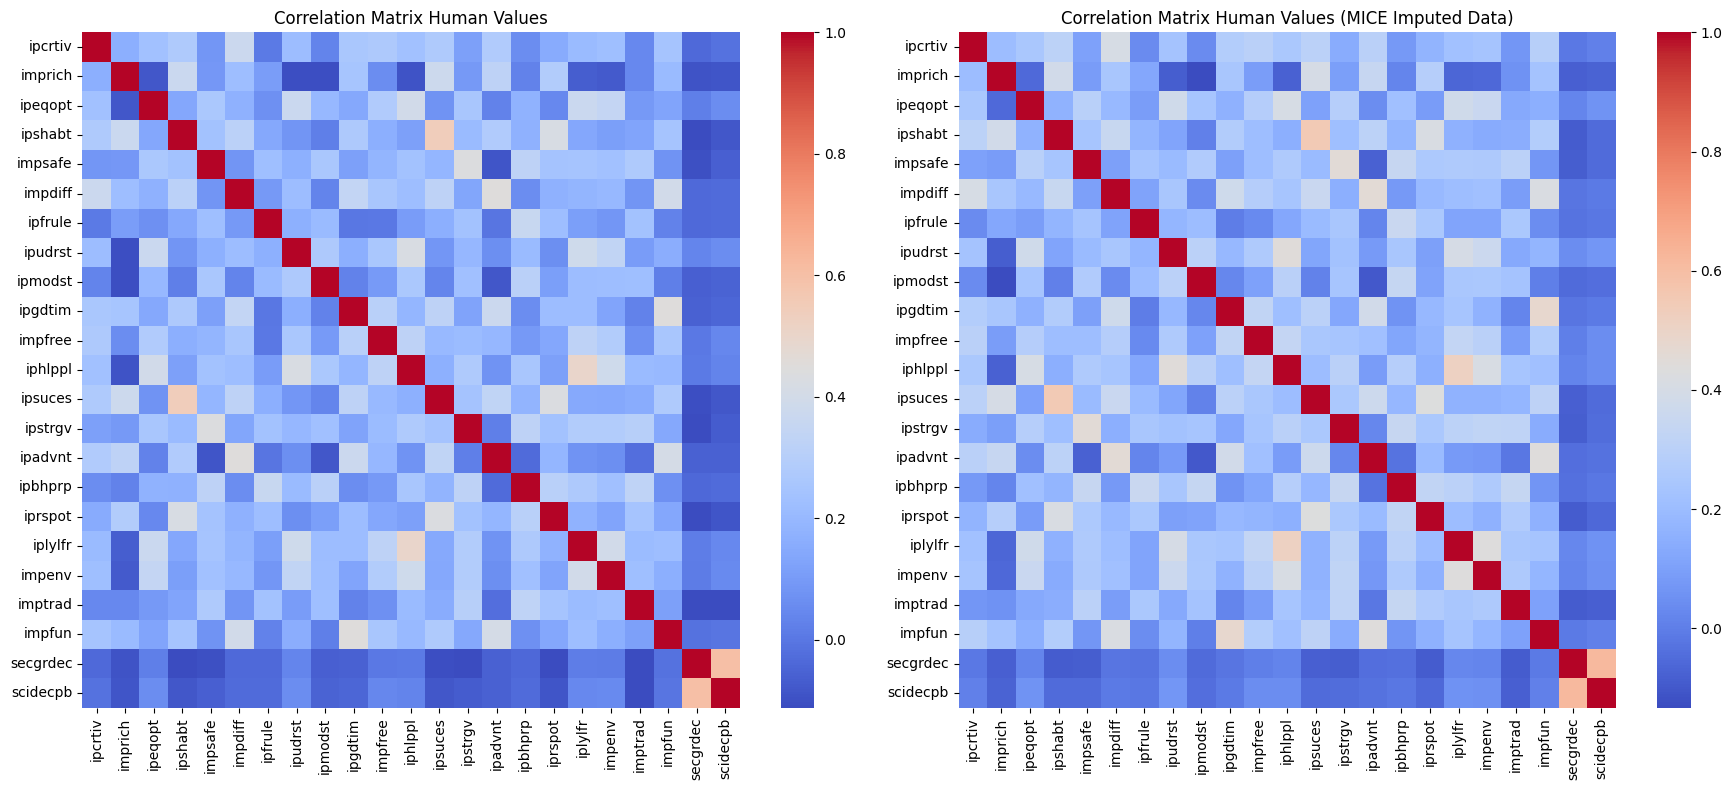

In [191]:
# correlation matrices
corr_matrix = df[human_values + y_vars].corr()
corr_matrix_mice = df_mice[human_values + y_vars].corr()

# sns.heatmap(corr_matrix, annot=False, cmap="coolwarm",
#             xticklabels=human_values + y_vars,
#             yticklabels=human_values + y_vars)
# plt.title("Correlation Matrix of Human Values")
# plt.show()

# Create subplots for two heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the first correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm",
            xticklabels=human_values + y_vars,
            yticklabels=human_values + y_vars,
            ax=axes[0])
axes[0].set_title("Correlation Matrix Human Values")

# Plot the second correlation matrix
sns.heatmap(corr_matrix_mice, annot=False, cmap="coolwarm",
            xticklabels=human_values + y_vars,
            yticklabels=human_values + y_vars,
            ax=axes[1])
axes[1].set_title("Correlation Matrix Human Values (MICE Imputed Data)")

# Show the plots
plt.tight_layout()
plt.show()

Trust variables

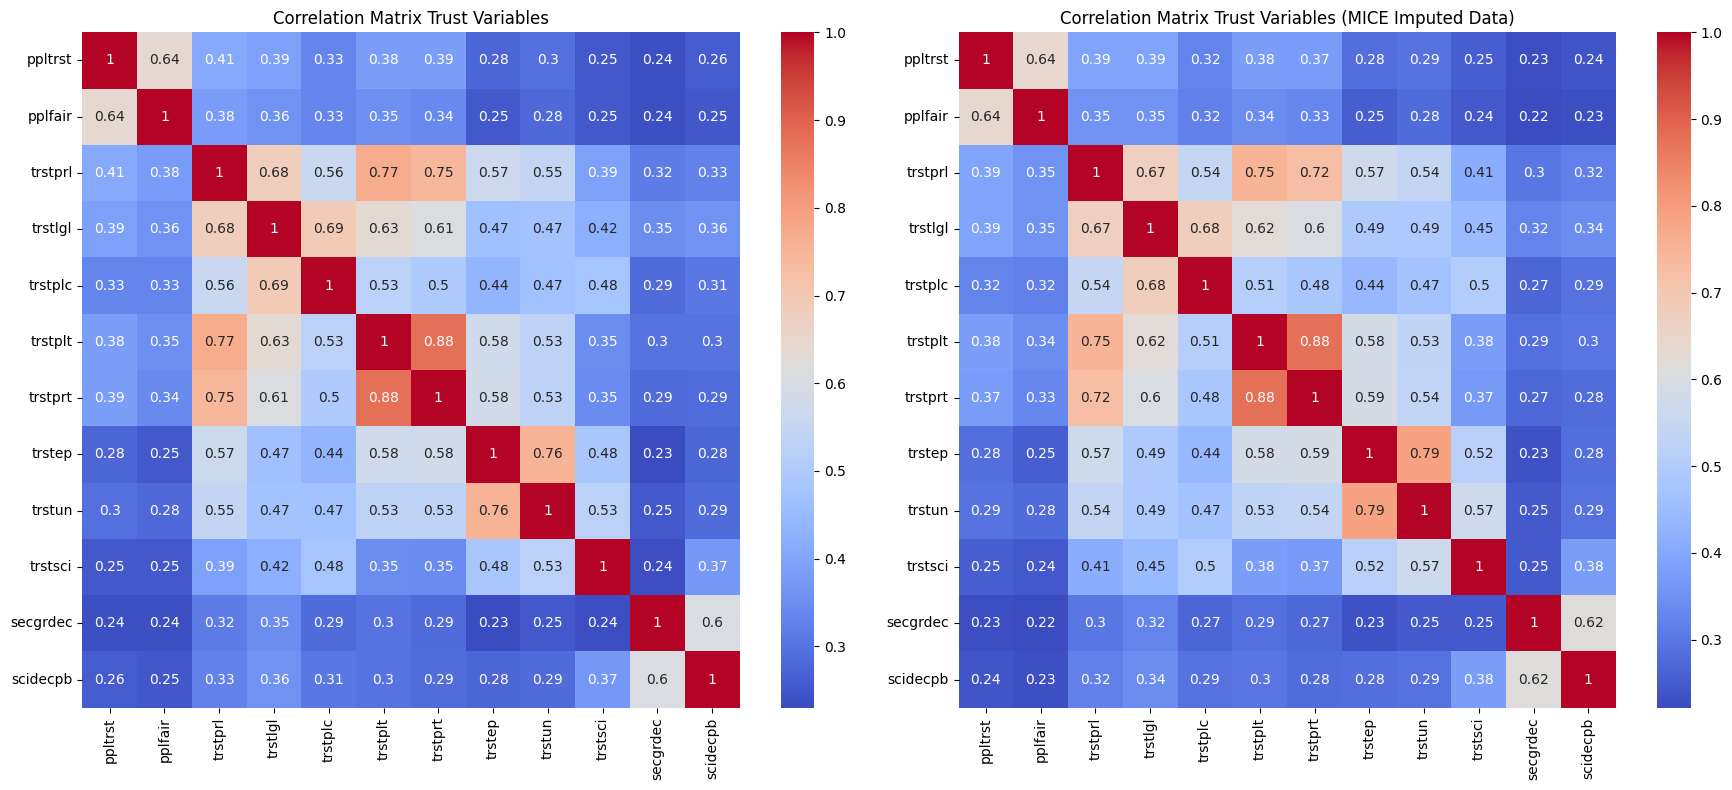

In [192]:
# correlation matrices
corr_matrix = df[trust_vars + y_vars].corr()
corr_matrix_mice = df_mice[trust_vars + y_vars].corr()

# sns.heatmap(corr_matrix, annot=False, cmap="coolwarm",
#             xticklabels=trust_vars + y_vars,
#             yticklabels=trust_vars + y_vars)
# plt.title("Correlation Matrix of Trust Variables")
# plt.show()

# Create subplots for two heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the first correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",
            xticklabels=trust_vars + y_vars,
            yticklabels=trust_vars + y_vars,
            ax=axes[0])
axes[0].set_title("Correlation Matrix Trust Variables")

# Plot the second correlation matrix
sns.heatmap(corr_matrix_mice, annot=True, cmap="coolwarm",
            xticklabels=trust_vars + y_vars,
            yticklabels=trust_vars + y_vars,
            ax=axes[1])
axes[1].set_title("Correlation Matrix Trust Variables (MICE Imputed Data)")

# Show the plots
plt.tight_layout()
plt.show()

### VIF test

We check Variance Inflation Factors for both Human Values and Trust variables, before doing PCA.  

Human Values

In [193]:
# VIF test for Human values

# Prepare the data
X = df[human_values]
X_mice = df_mice[human_values]
X = add_constant(X)  # Add a constant column for intercept
X_mice = add_constant(X_mice)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data_mice = pd.DataFrame({
    "Variable": X_mice.columns,
    "VIF": [variance_inflation_factor(X_mice.values, i) for i in range(X_mice.shape[1])]
})

print("\n=== VIF Test Results for Human Values ===\n")
print(vif_data)
print("\n=== VIF Test Results for Human Values - MICE Imputed Data ===\n")
print(vif_data_mice)



=== VIF Test Results for Human Values ===

   Variable       VIF
0     const  1.000000
1   ipcrtiv  1.324544
2   imprich  1.423133
3   ipeqopt  1.417405
4   ipshabt  1.657521
5   impsafe  1.460204
6   impdiff  1.543920
7   ipfrule  1.254759
8   ipudrst  1.452211
9   ipmodst  1.256601
10  ipgdtim  1.484098
11  impfree  1.334413
12  iphlppl  1.650849
13  ipsuces  1.735666
14  ipstrgv  1.447821
15  ipadvnt  1.589471
16  ipbhprp  1.458128
17  iprspot  1.479720
18  iplylfr  1.596764
19   impenv  1.412945
20  imptrad  1.278472
21   impfun  1.488430

=== VIF Test Results for Human Values - MICE Imputed Data ===

   Variable       VIF
0     const  1.000000
1   ipcrtiv  1.371607
2   imprich  1.463387
3   ipeqopt  1.431662
4   ipshabt  1.691471
5   impsafe  1.488082
6   impdiff  1.598239
7   ipfrule  1.253696
8   ipudrst  1.493693
9   ipmodst  1.308959
10  ipgdtim  1.509500
11  impfree  1.361455
12  iphlppl  1.713402
13  ipsuces  1.792877
14  ipstrgv  1.482017
15  ipadvnt  1.630760
16  ipbhprp 

No issue of multicollinearity apparently

Trust Variables

In [194]:
# VIF test for trust vars

# Prepare the data
X = df[trust_vars]
X_mice = df_mice[trust_vars]
X = add_constant(X)  # Add a constant column for intercept
X_mice = add_constant(X_mice)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data_mice = pd.DataFrame({
    "Variable": X_mice.columns,
    "VIF": [variance_inflation_factor(X_mice.values, i) for i in range(X_mice.shape[1])]
})

print("\n=== VIF Test Results for Trust Variables ===\n")
print(vif_data)
print("\n=== VIF Test Results for Trust Variables - MICE Imputed Data ===\n")
print(vif_data_mice)



=== VIF Test Results for Trust Variables ===

   Variable       VIF
0     const  1.000000
1   ppltrst  1.822977
2   pplfair  1.766536
3   trstprl  3.155497
4   trstlgl  2.648323
5   trstplc  2.160140
6   trstplt  5.208859
7   trstprt  4.785708
8    trstep  2.688965
9    trstun  2.662461
10  trstsci  1.569400

=== VIF Test Results for Trust Variables - MICE Imputed Data ===

   Variable       VIF
0     const  1.000000
1   ppltrst  1.822668
2   pplfair  1.755319
3   trstprl  2.919131
4   trstlgl  2.587364
5   trstplc  2.083592
6   trstplt  5.004428
7   trstprt  4.646991
8    trstep  3.013130
9    trstun  2.985480
10  trstsci  1.677899


Level of VIF close to 5 for `trstplt` and `trstprt`, meaning presence of mild multicollinearity. We will let PCA take care of it.

## Clustering

In [195]:
clust_vars = [
    'polintr',
    'lrscale',
    'stfeco',
    'stfgov',
    'accalaw']

#### Correlation check

Let's check the correlations between the economical-political variables we wnat to use to build clusters.

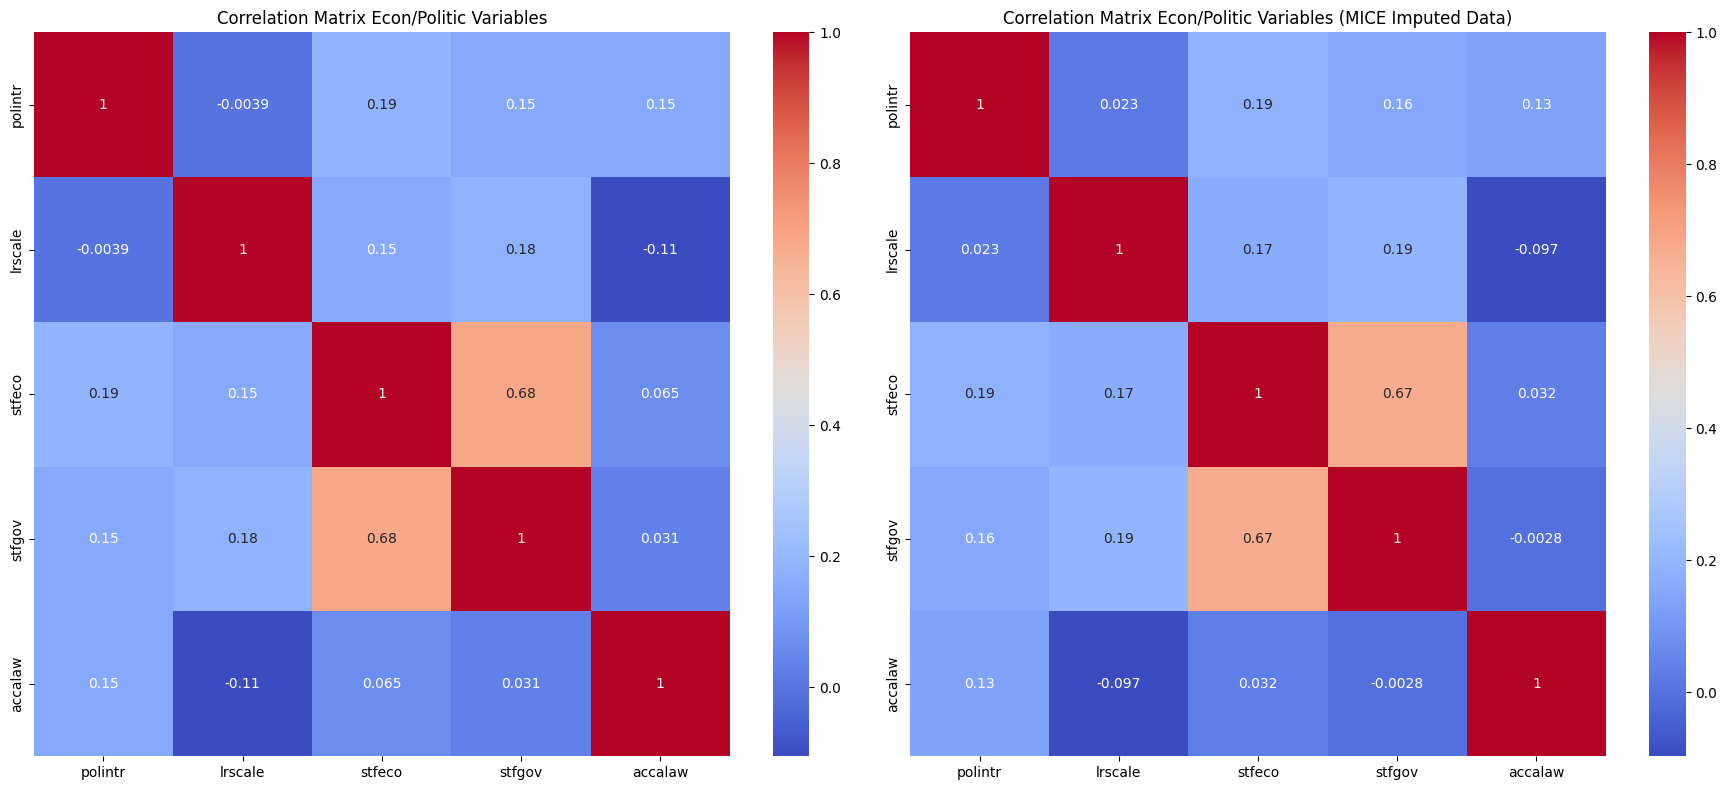

In [196]:
# correlation matrices
corr_matrix = df[clust_vars].corr()
corr_matrix_mice = df_mice[clust_vars].corr()

# Create subplots for two heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the first correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",
            xticklabels=clust_vars,
            yticklabels=clust_vars,
            ax=axes[0])
axes[0].set_title("Correlation Matrix Econ/Politic Variables")

# Plot the second correlation matrix
sns.heatmap(corr_matrix_mice, annot=True, cmap="coolwarm",
            xticklabels=clust_vars,
            yticklabels=clust_vars,
            ax=axes[1])
axes[1].set_title("Correlation Matrix Econ/Politic Variables (MICE Imputed Data)")

# Show the plots
plt.tight_layout()
plt.show()

Besides `stfeco` and `stfgov`, there are not much correlations.

#### VIF check

In [197]:
# VIF test for Econ/Politic Variables

# Prepare the data
X = df[clust_vars]
X_mice = df_mice[clust_vars]
X = add_constant(X)
X_mice = add_constant(X_mice)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data_mice = pd.DataFrame({
    "Variable": X_mice.columns,
    "VIF": [variance_inflation_factor(X_mice.values, i) for i in range(X_mice.shape[1])]
})

print("\n=== VIF Test Results for Econ/Politic Variables ===\n")
print(vif_data)
print("\n=== VIF Test Results for Econ/Politic Variables - MICE Imputed Data ===\n")
print(vif_data_mice)


=== VIF Test Results for Econ/Politic Variables ===

  Variable       VIF
0    const  1.000000
1  polintr  1.059899
2  lrscale  1.049388
3   stfeco  1.909389
4   stfgov  1.898657
5  accalaw  1.038856

=== VIF Test Results for Econ/Politic Variables - MICE Imputed Data ===

  Variable       VIF
0    const  1.000000
1  polintr  1.056182
2  lrscale  1.051498
3   stfeco  1.851377
4   stfgov  1.848602
5  accalaw  1.030369


#### Multivariate Normality Test (Henze-Zirkler test)

Tested only a fraction of the DF because this test has a time complexity of 𝑂(𝑛²).

In [198]:
# Run the Henze-Zirkler test for multivariate normality
hz_test_results = multivariate_normality(df[clust_vars].sample(frac=0.2, random_state=33), alpha=0.05)
print(hz_test_results)

HZResults(hz=7.910675383451973, pval=0.0, normal=False)


### GMM

In [199]:
X_scaled = df[clust_vars]

# Select Optimal Number of Clusters (K) using BIC
n_components_range = range(1, 15)  # Test from 1 to 10 clusters
covariance_types = ['spherical', 'tied', 'diag', 'full']  # Try different covariance models
best_bic = np.inf
best_gmm = None
best_k = None
best_cov_type = None
bic_scores = []

for cov_type in covariance_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
        gmm.fit(X_scaled)
        bic = gmm.bic(X_scaled)
        bic_scores.append((n_components, cov_type, bic))

        if bic < best_bic:
            best_bic = bic
            best_gmm = gmm
            best_k = n_components
            best_cov_type = cov_type

print(f"Best model: {best_k} clusters with {best_cov_type} covariance structure (BIC = {best_bic:.2f})")


Best model: 12 clusters with full covariance structure (BIC = -20695.73)


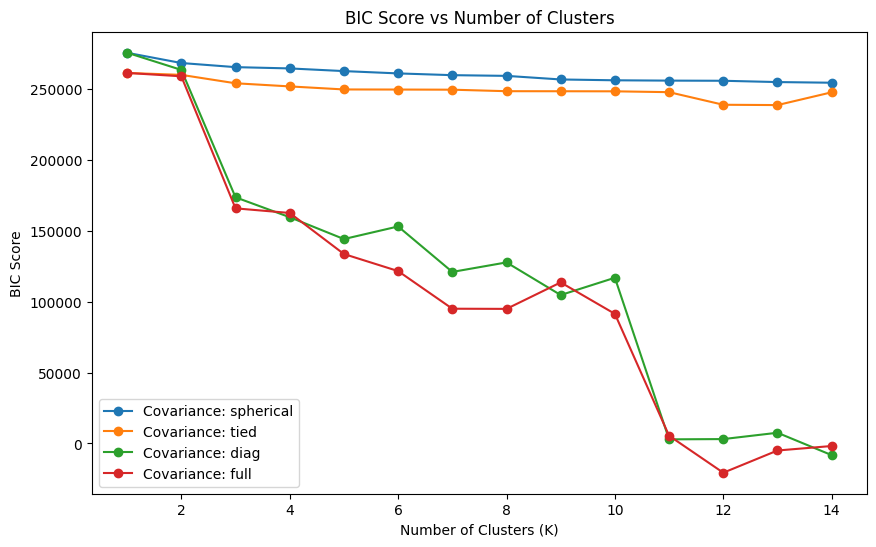

In [200]:
# Plot BIC Scores
bic_df = pd.DataFrame(bic_scores, columns=['n_components', 'covariance_type', 'BIC'])

plt.figure(figsize=(10, 6))
for cov_type in covariance_types:
    subset = bic_df[bic_df['covariance_type'] == cov_type]
    plt.plot(subset['n_components'], subset['BIC'], marker='o', label=f'Covariance: {cov_type}')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Clusters')
plt.legend()
plt.show()


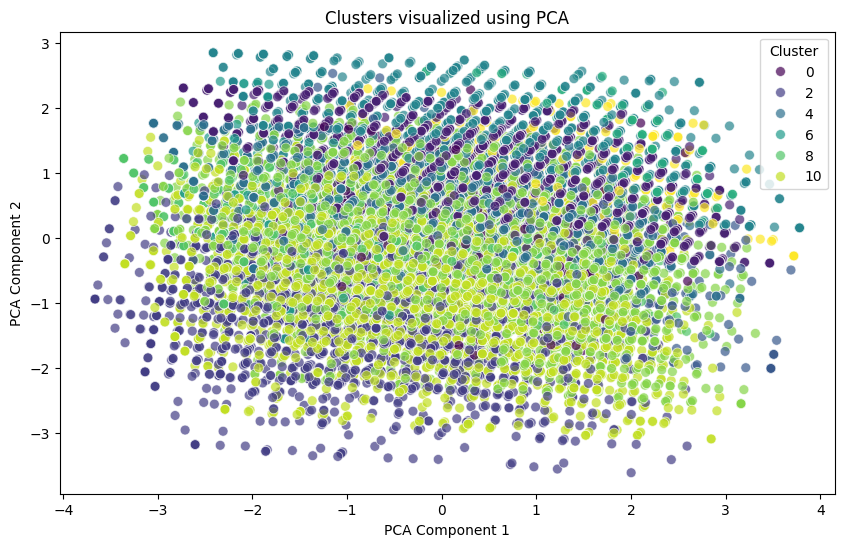

In [201]:
df_clean = df.copy()
df_gmm = df.copy()
df_gmm_non_std = df_non_std.copy()

# Fit the GMM using best K and Covariance Type
best_gmm = GaussianMixture(n_components=best_k, covariance_type=best_cov_type)
best_gmm.fit(X_scaled)

# Assign Clusters to Data (MAP Rule)
df_clean['cluster'] = best_gmm.predict(X_scaled)

# Attach cluster labels
df_gmm['cluster'] = np.nan  # Initialize the cluster column in the original dataframe
df_gmm.loc[df_clean.index, 'cluster'] = df_clean['cluster']

df_gmm_non_std['cluster'] = np.nan  # Initialize the cluster column in the original dataframe
df_gmm_non_std.loc[df_clean.index, 'cluster'] = df_clean['cluster']


#Visualize the Clusters through PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=df_clean['cluster'], palette='viridis', s=50, alpha=0.7)
plt.title('Clusters visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [202]:
print(f'Silhouette value for GMM clusters: {silhouette_score(df[clust_vars], df_gmm["cluster"])}')

Silhouette value for GMM clusters: 0.01465003606658297


In [203]:
for col in clust_vars:
  print(col, np.sort(df_non_std[col].unique()))

polintr [1. 2. 3. 4.]
lrscale [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
stfeco [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
stfgov [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
accalaw [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [204]:
df_gmm['cluster'].value_counts()

,count
cluster,
10.0,4199
9.0,4076
1.0,3445
2.0,2326
4.0,2230
5.0,1162
8.0,896
3.0,355
11.0,236


In [205]:
df_gmm_non_std.drop(columns=['cntry']).groupby('cluster').mean()[clust_vars]

,polintr,lrscale,stfeco,stfgov,accalaw
cluster,,,,,
0.0,4.0,4.971963,4.686916,4.668224,4.065421
1.0,3.0,5.018868,5.380552,5.071408,11.000000
2.0,1.0,5.199054,4.018057,3.914015,5.978934
3.0,4.0,6.411268,5.983099,6.188732,5.070423
4.0,2.0,5.055605,4.722422,4.517040,11.000000
5.0,4.0,4.605852,5.073150,4.378657,11.000000
6.0,4.0,4.869159,1.196262,0.392523,4.504673
7.0,4.0,4.989474,7.400000,8.000000,11.000000
8.0,1.0,5.065848,3.500000,3.214286,11.000000


### DBSCAN

In [206]:
X_scaled = df[clust_vars]
df_dbscan = df.copy()
df_dbscan_non_std = df_non_std.copy()

# Fit DBSCAN
dbscan = DBSCAN(eps=0.75, min_samples=5)
df_dbscan['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

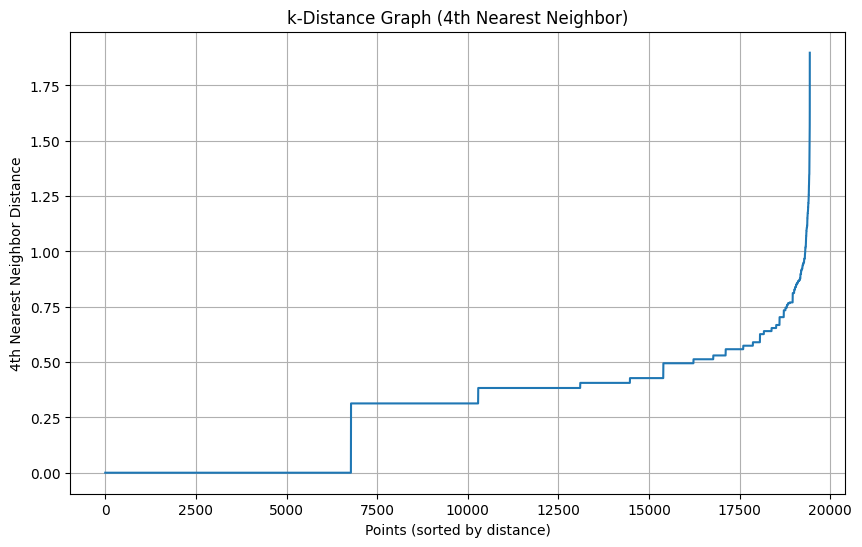

In [207]:
# Fit nearest neighbors to find distances
nearest_neighbors = NearestNeighbors(n_neighbors=5)  # min_samples=5
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Sort distances and plot
distances = np.sort(distances[:, 4])  # 4th nearest neighbor distance
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points (sorted by distance)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('k-Distance Graph (4th Nearest Neighbor)')
plt.grid(True)
plt.show()

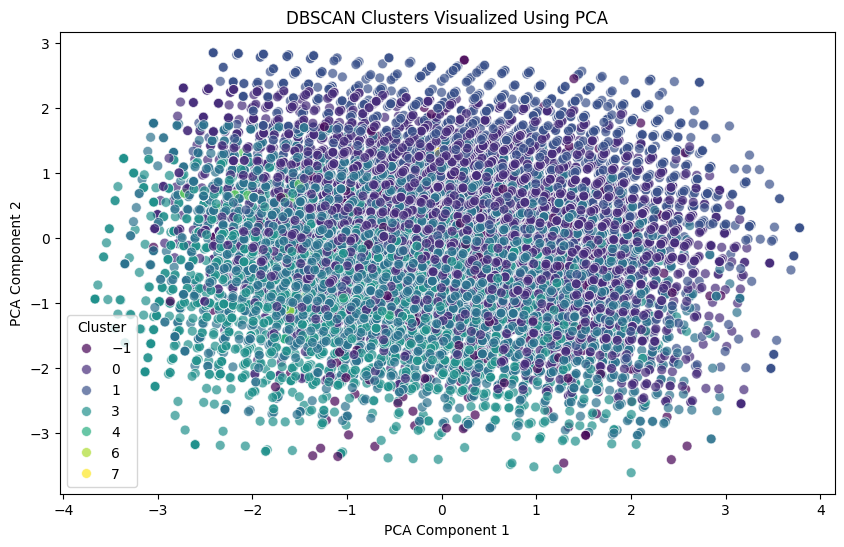

In [208]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Add DBSCAN cluster labels to the dataset
df_dbscan['dbscan_cluster'] = dbscan.labels_
df_dbscan_non_std['dbscan_cluster'] = dbscan.labels_

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=df_dbscan['dbscan_cluster'], palette='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clusters Visualized Using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

In [209]:
noise_points = df_dbscan[df_dbscan['dbscan_cluster'] == -1]
print(f"Number of noise points: {len(noise_points)}")

Number of noise points: 267


In [210]:
cluster_summary = df_dbscan_non_std.groupby('dbscan_cluster')[clust_vars].mean()
print(cluster_summary)

                 polintr   lrscale    stfeco    stfgov   accalaw
dbscan_cluster                                                  
-1              2.722846  4.629213  4.981273  5.378277  4.524345
 0              3.000000  5.295409  5.216437  4.970151  8.475840
 1              4.000000  5.091603  5.434637  5.075382  9.383588
 2              2.000000  5.287615  4.724753  4.555347  7.881321
 3              1.000000  5.162385  3.834761  3.675230  7.424041
 4              4.000000  9.703704  1.703704  1.370370  2.185185
 5              4.000000  0.625000  1.916667  1.041667  1.791667
 6              4.000000  7.333333  2.000000  0.166667  2.166667
 7              4.000000  0.000000  4.800000  5.000000  2.600000


In [211]:
# Compute silhouette score
labels = df_dbscan['dbscan_cluster']
if len(set(labels)) > 1 and -1 not in labels:  # Ensure there are multiple clusters
    silhouette = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette:.4f}")
else:
    print("Cannot compute silhouette score: insufficient clusters or all points are noise.")


Silhouette Score: 0.0434


In [212]:
df_dbscan['dbscan_cluster'].value_counts()

,count
dbscan_cluster,
0,7471
2,6387
3,3153
1,2096
-1,267
4,27
5,24
6,6
7,5


The main meaningful clusters are 0 to 3, the others have very few cases.

## PCA

#### NA-dropped DF

Human values

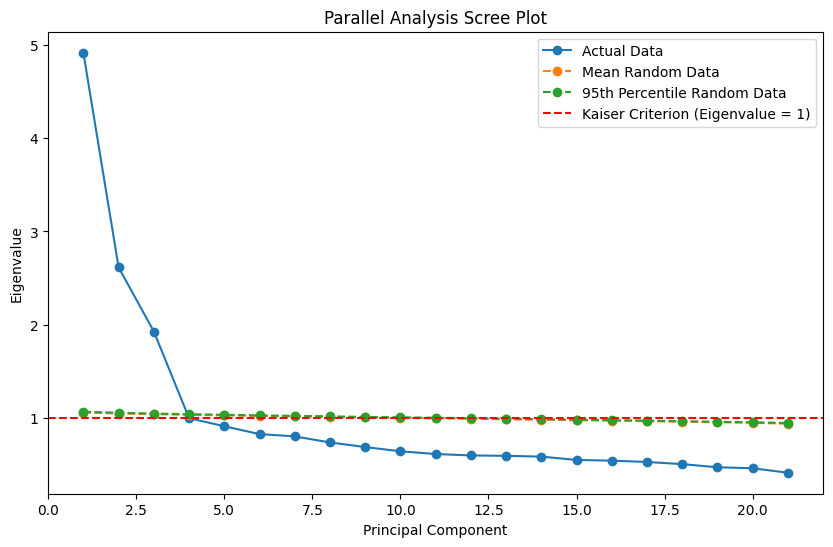

In [279]:
# Extract the human value columns (already standardized)
X_std = df[human_values].values

pca = PCA()
pca.fit(X_std)
eigenvalues = pca.explained_variance_

# Simulate random datasets and compute eigenvalues
n_samples, n_variables = X_std.shape
n_simulations = 100  # Number of random datasets to generate
random_eigenvalues = []

for _ in range(n_simulations):
    random_data = np.random.normal(size=(n_samples, n_variables))
    random_pca = PCA()
    random_pca.fit(random_data)
    random_eigenvalues.append(random_pca.explained_variance_)

# Convert the list of random eigenvalues into an array for comparison
random_eigenvalues = np.array(random_eigenvalues)

# Compute the mean and 95th percentile of the random eigenvalues
mean_random_eigenvalues = random_eigenvalues.mean(axis=0)
percentile_95_random_eigenvalues = np.percentile(random_eigenvalues, 95, axis=0)

# Plot actual vs. random eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label="Actual Data")
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, marker='o', linestyle='--', label="Mean Random Data")
plt.plot(range(1, len(percentile_95_random_eigenvalues) + 1), percentile_95_random_eigenvalues, marker='o', linestyle='--', label="95th Percentile Random Data")
plt.axhline(y=1, color='red', linestyle='--', label="Kaiser Criterion (Eigenvalue = 1)")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Parallel Analysis Scree Plot")
plt.legend()
plt.show()


From the Scree plot, the best number of loading appears to be 4.

In [282]:
# Get the loadings
X_std = df[human_values].values

pca = PCA(n_components=4)
X_pca_hv = pca.fit_transform(X_std)

loadings = pd.DataFrame(pca.components_, columns=human_values, index=[f"PC{i+1}" for i in range(4)])
print('PC loadings:')
print(tabulate(loadings, headers=loadings.columns))



PC loadings:
       ipcrtiv     imprich    ipeqopt    ipshabt    impsafe    impdiff    ipfrule    ipudrst     ipmodst     ipgdtim     impfree     iphlppl    ipsuces    ipstrgv    ipadvnt    ipbhprp     iprspot     iplylfr      impenv    imptrad     impfun
---  ---------  ----------  ---------  ---------  ---------  ---------  ---------  ---------  ----------  ----------  ----------  ----------  ---------  ---------  ---------  ---------  ----------  ----------  ----------  ---------  ---------
PC1   0.217863   0.118879    0.220119   0.241129   0.218922   0.241613   0.142564   0.223896   0.152136    0.22693     0.232968    0.265601    0.255335   0.24336    0.169978   0.210229   0.221568    0.265945    0.239185    0.175333   0.224302
PC2   0.149199   0.355836   -0.194485   0.238934  -0.184306   0.23367   -0.118311  -0.196897  -0.282175    0.240769    0.0107464  -0.205002    0.252509  -0.157774   0.374983  -0.213021   0.111271   -0.190344   -0.190642   -0.160211   0.223313
PC3  -0.191616 

In [283]:
print('Explained Variance Ratio:')
print(pca.explained_variance_ratio_.sum())

Explained Variance Ratio:
0.4980045046929026


Possible interpretation:



*   PC1 = Positive loadings across all variables:
ipsuces (success), iphlppl (helping others), impenv (caring for nature), iplylfr (loyalty to friends), ipgdtim (good time), etc.
    *    General Alignment with Positive Human Values
*   PC2 = Variables with high positive loadings:
imprich (being rich), ipshabt (showing abilities), ipadvnt (seeking adventures). Variables with high negative loadings:
ipmodst (modesty), iphlppl (helping others), iplylfr (loyalty).
    *   Materialistic and not altruistic
*   PC3 = Variables with high positive loadings:
ipfrule (following rules), ipbhprp (behaving properly), iprspot (seeking respect). Variables with high negative loadings:
ipudrst (understanding others), ipeqopt (equality), impfree (make own decision).
    *   Conservatism and adherence to traditional social rules
*   PC4 = Variables with high positive loadings:
ipmodst (modesty), ipudrst (understanding others), ipadvnt (seeking adventures), ipbhprp (behaving properly). Variables with high negative loadings:
impsafe (security), ipstrgv (strong government).
    *    Contrast between stability and personal freedom




Trust variables

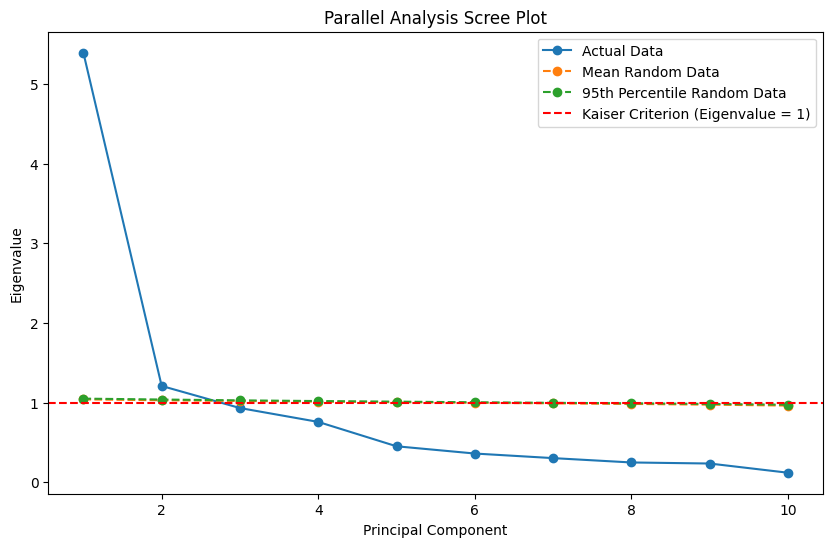

In [285]:
# Extract the trust variables columns (already standardized)
X_std = df[trust_vars].values

pca = PCA()
pca.fit(X_std)
eigenvalues = pca.explained_variance_

# Simulate random datasets and compute eigenvalues
n_samples, n_variables = X_std.shape
n_simulations = 100  # Number of random datasets to generate
random_eigenvalues = []

for _ in range(n_simulations):
    random_data = np.random.normal(size=(n_samples, n_variables))
    random_pca = PCA()
    random_pca.fit(random_data)
    random_eigenvalues.append(random_pca.explained_variance_)

# Convert the list of random eigenvalues into an array for comparison
random_eigenvalues = np.array(random_eigenvalues)

# Compute the mean and 95th percentile of the random eigenvalues
mean_random_eigenvalues = random_eigenvalues.mean(axis=0)
percentile_95_random_eigenvalues = np.percentile(random_eigenvalues, 95, axis=0)

# Plot actual vs. random eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label="Actual Data")
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, marker='o', linestyle='--', label="Mean Random Data")
plt.plot(range(1, len(percentile_95_random_eigenvalues) + 1), percentile_95_random_eigenvalues, marker='o', linestyle='--', label="95th Percentile Random Data")
plt.axhline(y=1, color='red', linestyle='--', label="Kaiser Criterion (Eigenvalue = 1)")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Parallel Analysis Scree Plot")
plt.legend()
plt.show()

Scree plot suggest us to take 3 PCs.

In [286]:
# Get the loadings
X_std = df[trust_vars].values

pca = PCA(n_components=3)
X_pca_tv = pca.fit_transform(X_std)

loadings = pd.DataFrame(pca.components_, columns=trust_vars, index=[f"PC{i+1}" for i in range(3)])
print('PC loadings:')
print(tabulate(loadings, headers=loadings.columns))

PC loadings:
       ppltrst    pplfair     trstprl      trstlgl     trstplc     trstplt     trstprt     trstep     trstun    trstsci
---  ---------  ---------  ----------  -----------  ----------  ----------  ----------  ---------  ---------  ---------
PC1   0.242477   0.230298   0.365244    0.342995     0.31607     0.364937    0.359862    0.322989   0.32179    0.258202
PC2   0.6193     0.638298  -0.0278086   0.00684389  -0.0299478  -0.0634191  -0.0673173  -0.300562  -0.272156  -0.185382
PC3   0.137754   0.198011  -0.280119   -0.138782     0.0746004  -0.39925    -0.390337    0.216423   0.330726   0.608721


In [287]:
print('Explained Variance Ratio:')
print(pca.explained_variance_ratio_.sum())

Explained Variance Ratio:
0.7531222903417065


Possible interpretation:
*   PC1 = trstprl (trust in parliament), trstlgl (trust in the legal system), trstplc (trust in the police), trstplt (trust in politicians), trstprt (trust in political parties), trstep (trust in the European Parliament), trstun (trust in the United Nations).
    *    Institutional Trust
*   PC2 = Variables with high positive loadings:
ppltrst (trust in people) and pplfair (perceived fairness). Variables with high negative loadings:
trstep (trust in the European Parliament), trstun (trust in the United Nations), and trstsci (trust in scientists).
    *    Interpersonal Trust
*   PC3 = Variables with high positive loadings:
trstsci (trust in scientists), trstun (trust in the United Nations), and trstep (trust in the European Parliament). Variables with high negative loadings:
trstplt (trust in politicians) and trstprt (trust in political parties).
    *   Trust in Global/Scientific Institutions


Add PCs to DF

In [217]:
# add PCs to dfs
pc_columns_tv = [f"PC_trust{i+1}" for i in range(X_pca_tv.shape[1])]
pc_columns_hv = [f"PC_hval{i+1}" for i in range(X_pca_hv.shape[1])]
df_pca_hv = pd.DataFrame(X_pca_hv, columns=pc_columns_hv, index=df.index)
df_pca_tv = pd.DataFrame(X_pca_tv, columns=pc_columns_tv, index=df.index)

# Concatenate the PCs with the original DataFrame
df_with_pca = pd.concat([df, df_pca_hv, df_pca_tv], axis=1)

df_gmm = pd.concat([df_gmm, df_pca_hv, df_pca_tv], axis=1)
df_dbscan = pd.concat([df_dbscan, df_pca_hv, df_pca_tv], axis=1)

In [218]:
df_with_pca.head()

,cntry,netusoft,ppltrst,pplfair,polintr,trstprl,trstlgl,trstplc,trstplt,trstprt,...,impenv,imptrad,impfun,PC_hval1,PC_hval2,PC_hval3,PC_hval4,PC_trust1,PC_trust2,PC_trust3
0,BE,0.574228,-0.479082,-0.738424,0.605573,0.135619,-0.139138,-0.982571,0.063196,0.068653,...,-0.839063,-1.719367,-0.094118,-1.074328,1.075067,-0.668664,0.114439,-0.721944,-0.623442,-0.728627
1,BE,0.574228,0.325327,-0.738424,1.715001,-0.615777,-0.139138,0.233324,-0.340709,-0.344585,...,-0.839063,-0.202591,-0.094118,-1.814146,1.163189,0.946783,0.521767,-0.853744,0.069292,0.116553
2,BE,0.574228,0.727531,1.031735,0.605573,1.262713,1.305651,0.638622,1.274912,1.721608,...,1.140788,-0.960979,0.700188,2.828818,2.328049,-2.658806,-0.226308,3.337940,0.202952,-0.834142
3,BE,-2.254844,1.129736,1.031735,-0.503855,1.262713,-0.139138,-1.387869,1.678817,0.481892,...,1.140788,1.314185,1.494494,3.602026,-2.245787,0.733443,0.471851,2.241251,0.399337,0.210195
4,BE,0.574228,-0.881286,0.589195,-0.503855,-0.615777,-0.139138,-0.577273,-0.744615,-0.757824,...,1.140788,-0.960979,-0.888425,-1.919087,-0.852349,-2.289107,0.814905,-1.276723,0.168831,0.870672


#### DF MICE

Human Values

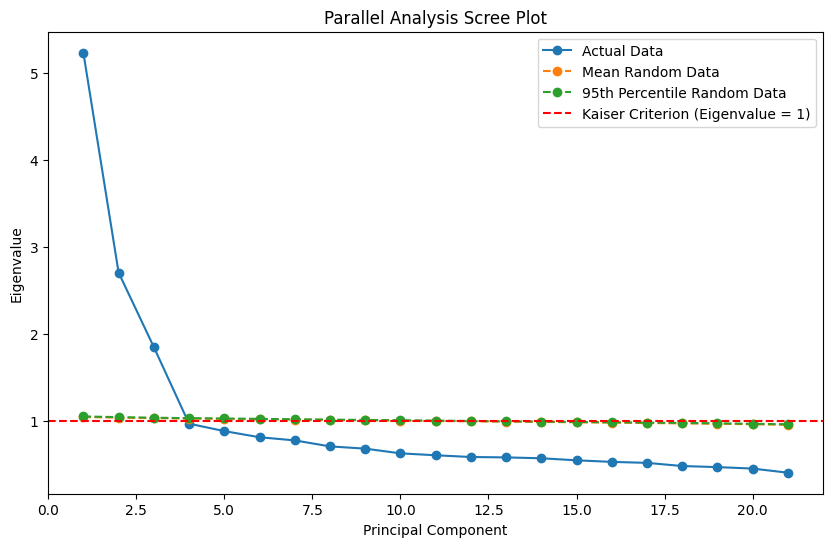

In [219]:
# Extract the human value columns (already standardized)
X_std = df_mice[human_values].values

pca = PCA()
pca.fit(X_std)
eigenvalues = pca.explained_variance_

# Simulate random datasets and compute eigenvalues
n_samples, n_variables = X_std.shape
n_simulations = 100  # Number of random datasets to generate
random_eigenvalues = []

for _ in range(n_simulations):
    random_data = np.random.normal(size=(n_samples, n_variables))
    random_pca = PCA()
    random_pca.fit(random_data)
    random_eigenvalues.append(random_pca.explained_variance_)

# Convert the list of random eigenvalues into an array for comparison
random_eigenvalues = np.array(random_eigenvalues)

# Compute the mean and 95th percentile of the random eigenvalues
mean_random_eigenvalues = random_eigenvalues.mean(axis=0)
percentile_95_random_eigenvalues = np.percentile(random_eigenvalues, 95, axis=0)

# Plot actual vs. random eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label="Actual Data")
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, marker='o', linestyle='--', label="Mean Random Data")
plt.plot(range(1, len(percentile_95_random_eigenvalues) + 1), percentile_95_random_eigenvalues, marker='o', linestyle='--', label="95th Percentile Random Data")
plt.axhline(y=1, color='red', linestyle='--', label="Kaiser Criterion (Eigenvalue = 1)")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Parallel Analysis Scree Plot")
plt.legend()
plt.show()

In [220]:
# Get the loadings
X_std = df_mice[human_values].values

pca = PCA(n_components=4)
X_pca_hv = pca.fit_transform(X_std)

loadings = pd.DataFrame(pca.components_, columns=human_values, index=[f"PC{i+1}" for i in range(4)])
print('PC loadings:')
print(tabulate(loadings, headers=loadings.columns))

PC loadings:
        ipcrtiv     imprich    ipeqopt    ipshabt    impsafe    impdiff    ipfrule    ipudrst     ipmodst     ipgdtim    impfree     iphlppl     ipsuces    ipstrgv     ipadvnt    ipbhprp     iprspot    iplylfr      impenv     imptrad     impfun
---  ----------  ----------  ---------  ---------  ---------  ---------  ---------  ---------  ----------  ----------  ---------  ----------  ----------  ---------  ----------  ---------  ----------  ---------  ----------  ----------  ---------
PC1   0.22155     0.120183    0.223714   0.239981   0.21595    0.242388   0.1466     0.22954    0.14836     0.216418    0.23581    0.267603    0.25235     0.24029    0.169525    0.209667   0.219599    0.264711   0.244504    0.178954    0.221316
PC2   0.164446    0.34418    -0.177518   0.228668  -0.196405   0.238906  -0.110118  -0.177377  -0.305726    0.236914    0.036624  -0.187729    0.242982   -0.166423   0.376125   -0.231869   0.0756227  -0.180854  -0.182043   -0.175006    0.247208
PC3  -0

Trust variables

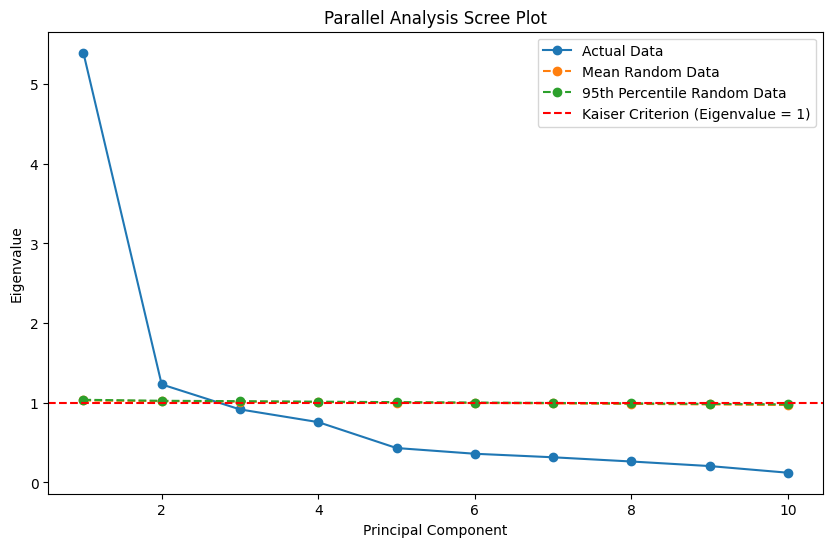

In [221]:
# Extract the trust variables columns (already standardized)
X_std = df_mice[trust_vars].values

pca = PCA()
pca.fit(X_std)
eigenvalues = pca.explained_variance_

# Simulate random datasets and compute eigenvalues
n_samples, n_variables = X_std.shape
n_simulations = 100  # Number of random datasets to generate
random_eigenvalues = []

for _ in range(n_simulations):
    random_data = np.random.normal(size=(n_samples, n_variables))
    random_pca = PCA()
    random_pca.fit(random_data)
    random_eigenvalues.append(random_pca.explained_variance_)

# Convert the list of random eigenvalues into an array for comparison
random_eigenvalues = np.array(random_eigenvalues)

# Compute the mean and 95th percentile of the random eigenvalues
mean_random_eigenvalues = random_eigenvalues.mean(axis=0)
percentile_95_random_eigenvalues = np.percentile(random_eigenvalues, 95, axis=0)

# Plot actual vs. random eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label="Actual Data")
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, marker='o', linestyle='--', label="Mean Random Data")
plt.plot(range(1, len(percentile_95_random_eigenvalues) + 1), percentile_95_random_eigenvalues, marker='o', linestyle='--', label="95th Percentile Random Data")
plt.axhline(y=1, color='red', linestyle='--', label="Kaiser Criterion (Eigenvalue = 1)")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Parallel Analysis Scree Plot")
plt.legend()
plt.show()

In [222]:
# Get the loadings
X_std = df_mice[trust_vars].values

pca = PCA(n_components=3)
X_pca_tv = pca.fit_transform(X_std)

loadings = pd.DataFrame(pca.components_, columns=trust_vars, index=[f"PC{i+1}" for i in range(3)])
print('PC loadings:')
print(tabulate(loadings, headers=loadings.columns))

PC loadings:
       ppltrst    pplfair     trstprl      trstlgl    trstplc     trstplt     trstprt     trstep     trstun    trstsci
---  ---------  ---------  ----------  -----------  ---------  ----------  ----------  ---------  ---------  ---------
PC1   0.238372   0.223719   0.35975     0.343276     0.310676   0.362062    0.3569      0.330796   0.327669   0.272195
PC2   0.621861   0.644602  -0.0311744   0.00878509  -0.030189  -0.0515127  -0.0611542  -0.281175  -0.26464   -0.200823
PC3   0.138749   0.195861  -0.291711   -0.120589     0.102093  -0.418774   -0.41375     0.216791   0.334957   0.571465


Add PCs to DF MICE

In [223]:
# add PCs to dfs
pc_columns_tv = [f"PC_trust{i+1}" for i in range(X_pca_tv.shape[1])]
pc_columns_hv = [f"PC_hval{i+1}" for i in range(X_pca_hv.shape[1])]
df_pca_hv = pd.DataFrame(X_pca_hv, columns=pc_columns_hv, index=df_mice.index)
df_pca_tv = pd.DataFrame(X_pca_tv, columns=pc_columns_tv, index=df_mice.index)

# Concatenate the PCs with the original DataFrame
df_with_pca_mice = pd.concat([df_mice, df_pca_hv, df_pca_tv], axis=1)


## MANOVA

#### Grouping by cluster

First let's model the PCs of Human Values, Trust variables and conspiracy beliefs as dependent vars against the groups obtained from the clustering.

GMM clustering

In [224]:
group_var = 'cluster'
PC_human_val = ['PC_hval1', 'PC_hval2', 'PC_hval3', 'PC_hval4']
PC_trust_var = ['PC_trust1', 'PC_trust2', 'PC_trust3']

manova_data = df_gmm[[group_var] + PC_human_val]

# Fit the MANOVA model
# Formula: dependent variables ~ grouping variable
manova_formula = ' + '.join(PC_human_val) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9769 4.0000 19431.0000 114.9586 0.0000
         Pillai's trace 0.0231 4.0000 19431.0000 114.9586 0.0000
 Hotelling-Lawley trace 0.0237 4.0000 19431.0000 114.9586 0.0000
    Roy's greatest root 0.0237 4.0000 19431.0000 114.9586 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        cluster         Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9683 4.0000 19431.0000 159.0108 0.0000
         Pillai's trace 0.0317 4.0000 19431.0

In [225]:
manova_data = df_gmm[[group_var] + PC_trust_var]

# Fit the MANOVA model
# Formula: dependent variables ~ grouping variable
manova_formula = ' + '.join(PC_trust_var) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9922 3.0000 19432.0000 51.0694 0.0000
         Pillai's trace 0.0078 3.0000 19432.0000 51.0694 0.0000
 Hotelling-Lawley trace 0.0079 3.0000 19432.0000 51.0694 0.0000
    Roy's greatest root 0.0079 3.0000 19432.0000 51.0694 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        cluster         Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9892 3.0000 19432.0000 70.6392 0.0000
         Pillai's trace 0.0108 3.0000 19432.0000 70.6392 0.

In [226]:
# y variables
manova_data = df_gmm[[group_var] + y_vars]
manova_formula = ' + '.join(y_vars) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9928 2.0000 19433.0000 70.9129 0.0000
         Pillai's trace 0.0072 2.0000 19433.0000 70.9129 0.0000
 Hotelling-Lawley trace 0.0073 2.0000 19433.0000 70.9129 0.0000
    Roy's greatest root 0.0073 2.0000 19433.0000 70.9129 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        cluster         Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9900 2.0000 19433.0000 98.0867 0.0000
         Pillai's trace 0.0100 2.0000 19433.0000 98.0867 0.

DBSCAN clustering

In [227]:
# human values
group_var = 'dbscan_cluster'
PC_human_val = ['PC_hval1', 'PC_hval2', 'PC_hval3', 'PC_hval4']
PC_trust_var = ['PC_trust1', 'PC_trust2', 'PC_trust3']

manova_data = df_dbscan[[group_var] + PC_human_val]

manova_formula = ' + '.join(PC_human_val) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9931 4.0000 19431.0000 33.7306 0.0000
         Pillai's trace 0.0069 4.0000 19431.0000 33.7306 0.0000
 Hotelling-Lawley trace 0.0069 4.0000 19431.0000 33.7306 0.0000
    Roy's greatest root 0.0069 4.0000 19431.0000 33.7306 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
     dbscan_cluster     Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9870 4.0000 19431.0000 63.8302 0.0000
         Pillai's trace 0.0130 4.0000 19431.0000 63.8302 0.

In [228]:
manova_data = df_dbscan[[group_var] + PC_trust_var]

manova_formula = ' + '.join(PC_trust_var) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9671 3.0000 19432.0000 220.1799 0.0000
         Pillai's trace 0.0329 3.0000 19432.0000 220.1799 0.0000
 Hotelling-Lawley trace 0.0340 3.0000 19432.0000 220.1799 0.0000
    Roy's greatest root 0.0340 3.0000 19432.0000 220.1799 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
     dbscan_cluster     Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9396 3.0000 19432.0000 416.6577 0.0000
         Pillai's trace 0.0604 3.0000 19432.0

In [229]:
# y variables
manova_data = df_dbscan[[group_var] + y_vars]
manova_formula = ' + '.join(y_vars) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        Intercept        Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9922 2.0000 19433.0000 76.0055 0.0000
          Pillai's trace 0.0078 2.0000 19433.0000 76.0055 0.0000
  Hotelling-Lawley trace 0.0078 2.0000 19433.0000 76.0055 0.0000
     Roy's greatest root 0.0078 2.0000 19433.0000 76.0055 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
     dbscan_cluster     Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9854 2.0000 19433.0000 143.8290 0.0000
         Pillai's trace 0.0146 2.0000 19433.0

#### Grouping by country

NA-dropped DF

In [230]:
group_var = 'cntry'
PC_human_val = ['PC_hval1', 'PC_hval2', 'PC_hval3', 'PC_hval4']
PC_trust_var = ['PC_trust1', 'PC_trust2', 'PC_trust3']

manova_data = df_with_pca[[group_var] + PC_human_val]

# Fit the MANOVA model
# Formula: dependent variables ~ grouping variable
manova_formula = ' + '.join(PC_human_val) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
         Intercept        Value  Num DF   Den DF   F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.9845 4.0000 19415.0000 76.1760 0.0000
           Pillai's trace 0.0155 4.0000 19415.0000 76.1760 0.0000
   Hotelling-Lawley trace 0.0157 4.0000 19415.0000 76.1760 0.0000
      Roy's greatest root 0.0157 4.0000 19415.0000 76.1760 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         cntry          Value   Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.6460 68.0000 76192.2803 131.9500 0.0000
         Pillai's trace 0.3895

In [231]:
manova_data = df_with_pca[[group_var] + PC_trust_var]

manova_formula = ' + '.join(PC_trust_var) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
         Intercept        Value  Num DF   Den DF   F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.9961 3.0000 19416.0000 25.1380 0.0000
           Pillai's trace 0.0039 3.0000 19416.0000 25.1380 0.0000
   Hotelling-Lawley trace 0.0039 3.0000 19416.0000 25.1380 0.0000
      Roy's greatest root 0.0039 3.0000 19416.0000 25.1380 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         cntry          Value   Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.5940 51.0000 57805.3430 216.6791 0.0000
         Pillai's trace 0.4392

In [232]:
manova_data = df_with_pca[[group_var] + y_vars]

manova_formula = ' + '.join(y_vars) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
         Intercept        Value  Num DF   Den DF   F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.9996 2.0000 19417.0000  3.8298 0.0217
           Pillai's trace 0.0004 2.0000 19417.0000  3.8298 0.0217
   Hotelling-Lawley trace 0.0004 2.0000 19417.0000  3.8298 0.0217
      Roy's greatest root 0.0004 2.0000 19417.0000  3.8298 0.0217
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         cntry          Value   Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.8338 34.0000 38834.0000 108.6602 0.0000
         Pillai's trace 0.1684

MICE DF

In [233]:
group_var = 'cntry'
PC_human_val = ['PC_hval1', 'PC_hval2', 'PC_hval3', 'PC_hval4']
PC_trust_var = ['PC_trust1', 'PC_trust2', 'PC_trust3']

manova_data = df_with_pca_mice[[group_var] + PC_human_val]

# Fit the MANOVA model
# Formula: dependent variables ~ grouping variable
manova_formula = ' + '.join(PC_human_val) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
         Intercept        Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.9854 4.0000 34533.0000 127.5640 0.0000
           Pillai's trace 0.0146 4.0000 34533.0000 127.5640 0.0000
   Hotelling-Lawley trace 0.0148 4.0000 34533.0000 127.5640 0.0000
      Roy's greatest root 0.0148 4.0000 34533.0000 127.5640 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
         cntry          Value   Num DF    Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.6323 84.0000 136404.6075 199.8011 0.0000
         Pillai'

In [234]:
manova_data = df_with_pca_mice[[group_var] + PC_trust_var]

manova_formula = ' + '.join(PC_trust_var) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
          Intercept        Value  Num DF   Den DF   F Value Pr > F
------------------------------------------------------------------
             Wilks' lambda 0.9965 3.0000 34534.0000 40.2405 0.0000
            Pillai's trace 0.0035 3.0000 34534.0000 40.2405 0.0000
    Hotelling-Lawley trace 0.0035 3.0000 34534.0000 40.2405 0.0000
       Roy's greatest root 0.0035 3.0000 34534.0000 40.2405 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
         cntry          Value   Num DF    Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.6591 63.0000 103084.1807 245.2860 0.0000
         Pillai'

In [235]:
manova_data = df_with_pca_mice[[group_var] + y_vars]

manova_formula = ' + '.join(y_vars) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
         Intercept        Value  Num DF   Den DF   F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.9991 2.0000 34535.0000 15.2429 0.0000
           Pillai's trace 0.0009 2.0000 34535.0000 15.2429 0.0000
   Hotelling-Lawley trace 0.0009 2.0000 34535.0000 15.2429 0.0000
      Roy's greatest root 0.0009 2.0000 34535.0000 15.2429 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         cntry          Value   Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.8587 42.0000 69070.0000 130.2026 0.0000
         Pillai's trace 0.1435

#### Single MANOVA (MICE)

In [236]:
group_var = 'cntry'
PC_human_val = ['PC_hval1', 'PC_hval2', 'PC_hval3', 'PC_hval4']
PC_trust_var = ['PC_trust1', 'PC_trust2', 'PC_trust3']

manova_data = df_with_pca_mice[[group_var] + PC_human_val + PC_trust_var]

# Fit the MANOVA model
# Formula: dependent variables ~ grouping variable
manova_formula = ' + '.join(PC_human_val + PC_trust_var) + f' ~ {group_var}'
manova = MANOVA.from_formula(manova_formula, data=manova_data)

#  Perform the MANOVA test
manova_results = manova.mv_test()
print(manova_results)

                     Multivariate linear model
                                                                    
---------------------------------------------------------------------
        Intercept         Value   Num DF    Den DF    F Value  Pr > F
---------------------------------------------------------------------
           Wilks' lambda  0.9825  7.0000  34530.0000  87.7393  0.0000
          Pillai's trace  0.0175  7.0000  34530.0000  87.7393  0.0000
  Hotelling-Lawley trace  0.0178  7.0000  34530.0000  87.7393  0.0000
     Roy's greatest root  0.0178  7.0000  34530.0000  87.7393  0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
         cntry          Value   Num DF     Den DF    F Value  Pr > F
--------------------------------------------------------------------
          Wilks' lambda 0.4379 147.0000 230474.79

Results

In [237]:
df_non_std.describe()

,netusoft,ppltrst,pplfair,polintr,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
count,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,...,19436.00000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000,19436.000000
mean,4.188105,5.191140,5.668605,2.454157,4.639020,5.385213,6.424316,3.843538,3.833865,4.887631,...,4.88264,3.963367,4.656359,3.258644,4.330315,3.877444,5.036119,4.847602,4.267133,4.118491
std,1.413891,2.486298,2.259684,0.901365,2.661712,2.768570,2.467318,2.475828,2.419909,2.465638,...,0.95511,1.311757,1.144102,1.409746,1.219247,1.343041,0.941419,1.010177,1.318586,1.258960
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,5.000000,2.000000,2.000000,3.000000,...,4.00000,3.000000,4.000000,2.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000
50%,5.000000,5.000000,6.000000,3.000000,5.000000,6.000000,7.000000,4.000000,4.000000,5.000000,...,5.00000,4.000000,5.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
75%,5.000000,7.000000,7.000000,3.000000,7.000000,8.000000,8.000000,6.000000,6.000000,7.000000,...,6.00000,5.000000,5.000000,4.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000
max,5.000000,10.000000,10.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


## MIXED EFFECTS MODELS

In [238]:
# define control variables
control_vars = [
    'happy',
    'ctzcntr',
    'gndr',
    'agea',
    'eduyrs'
]

In [239]:
X_vars = PC_human_val + PC_trust_var + control_vars # fixed effects
group_var = 'cntry'  # Random effects variable


#### NA-dropped DF

In [240]:
# Prepare the dataframe
mixed_effects_data = df_with_pca[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()
print("\nMixed-Effects Model Results for secgrdec (Belief in secret groups):\n")
print(mixed_results_secgrdec.summary())

# Model for 'sciedecpb'
formula_sciedecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_sciedecpb = smf.mixedlm(formula_sciedecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_sciedecpb = mixed_model_sciedecpb.fit()
print("\nMixed-Effects Model Results for sciedecpb (Belief in scientific conspiracy):\n")
print(mixed_results_sciedecpb.summary())


Mixed-Effects Model Results for secgrdec (Belief in secret groups):

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: secgrdec   
No. Observations: 19436   Method:             REML       
No. Groups:       18      Scale:              0.7955     
Min. group size:  555     Log-Likelihood:     -25438.1676
Max. group size:  1957    Converged:          Yes        
Mean group size:  1079.8                                 
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.071    0.073  -0.976 0.329 -0.215  0.072
PC_hval1      -0.042    0.003 -13.368 0.000 -0.048 -0.035
PC_hval2      -0.022    0.004  -5.089 0.000 -0.031 -0.014
PC_hval3      -0.023    0.005  -4.292 0.000 -0.034 -0.013
PC_hval4      -0.002    0.007  -0.338 0.735 -0.015  0.011
PC_trust1      0.113    0.003  33.161 0.000  0.106  0.119
PC_trust2   

#### DF MICE

In [241]:
# Prepare the dataframe
mixed_effects_data = df_with_pca_mice[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()
print("\nMixed-Effects Model Results for secgrdec (Belief in secret groups):\n")
print(mixed_results_secgrdec.summary())

# Model for 'sciedecpb'
formula_sciedecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_sciedecpb = smf.mixedlm(formula_sciedecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_sciedecpb = mixed_model_sciedecpb.fit()
print("\nMixed-Effects Model Results for sciedecpb (Belief in scientific conspiracy):\n")
print(mixed_results_sciedecpb.summary())


Mixed-Effects Model Results for secgrdec (Belief in secret groups):

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: secgrdec   
No. Observations: 34558   Method:             REML       
No. Groups:       22      Scale:              0.8117     
Min. group size:  805     Log-Likelihood:     -45529.1020
Max. group size:  2691    Converged:          Yes        
Mean group size:  1570.8                                 
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.117    0.059  -1.989 0.047 -0.233 -0.002
PC_hval1      -0.033    0.002 -14.618 0.000 -0.038 -0.029
PC_hval2      -0.025    0.003  -7.613 0.000 -0.032 -0.019
PC_hval3      -0.020    0.004  -4.675 0.000 -0.028 -0.012
PC_hval4      -0.004    0.005  -0.837 0.402 -0.014  0.006
PC_trust1      0.112    0.002  45.108 0.000  0.107  0.116
PC_trust2   

Mixed effect model with all Human Values

In [242]:
X_vars = human_values + PC_trust_var + control_vars # fixed effects
group_var = 'cntry'  # Random effects variable

# Prepare the dataframe
mixed_effects_data = df_with_pca_mice[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()
print("\nMixed-Effects Model Results for secgrdec (Belief in secret groups):\n")
print(mixed_results_secgrdec.summary())

# Model for 'sciedecpb'
formula_sciedecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_sciedecpb = smf.mixedlm(formula_sciedecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_sciedecpb = mixed_model_sciedecpb.fit()
print("\nMixed-Effects Model Results for sciedecpb (Belief in scientific conspiracy):\n")
print(mixed_results_sciedecpb.summary())


Mixed-Effects Model Results for secgrdec (Belief in secret groups):

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: secgrdec   
No. Observations: 34558   Method:             REML       
No. Groups:       22      Scale:              0.8096     
Min. group size:  805     Log-Likelihood:     -45545.0821
Max. group size:  2691    Converged:          Yes        
Mean group size:  1570.8                                 
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  -0.115     0.058  -1.981  0.048  -0.229  -0.001
ipcrtiv    -0.027     0.006  -4.632  0.000  -0.038  -0.015
imprich    -0.023     0.006  -3.812  0.000  -0.035  -0.011
ipeqopt     0.015     0.006   2.641  0.008   0.004   0.027
ipshabt    -0.006     0.006  -0.966  0.334  -0.019   0.006
impsafe    -0.019     0.006  -3.199  0.001  -0.031  -0.007
imp

### Validates results

#### LRT Test

NA-dropped DF

In [243]:
X_vars = PC_human_val + PC_trust_var + control_vars # fixed effects

# Prepare the dataframe
mixed_effects_data = df_with_pca[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()


# Fit the fixed-effects model
fixed_model_secgrdec = smf.ols(formula_secgrdec, data=mixed_effects_data).fit()

# Likelihood ratio test
LLF1 = fixed_model_secgrdec.llf  # log-likelihood of fixed-effects model
LLF2 = mixed_results_secgrdec.llf  # log-likelihood of mixed-effects model

# Degrees of freedom difference (1 for random intercept)
df_diff = 1
likelihood_ratio = -2 * (LLF1 - LLF2)
p_value = chi2.sf(likelihood_ratio, df_diff)

print(f"Likelihood Ratio Test for secgrdec: Chi2 = {likelihood_ratio:.4f}, p = {p_value:.4f}")


Likelihood Ratio Test for secgrdec: Chi2 = 861.9888, p = 0.0000


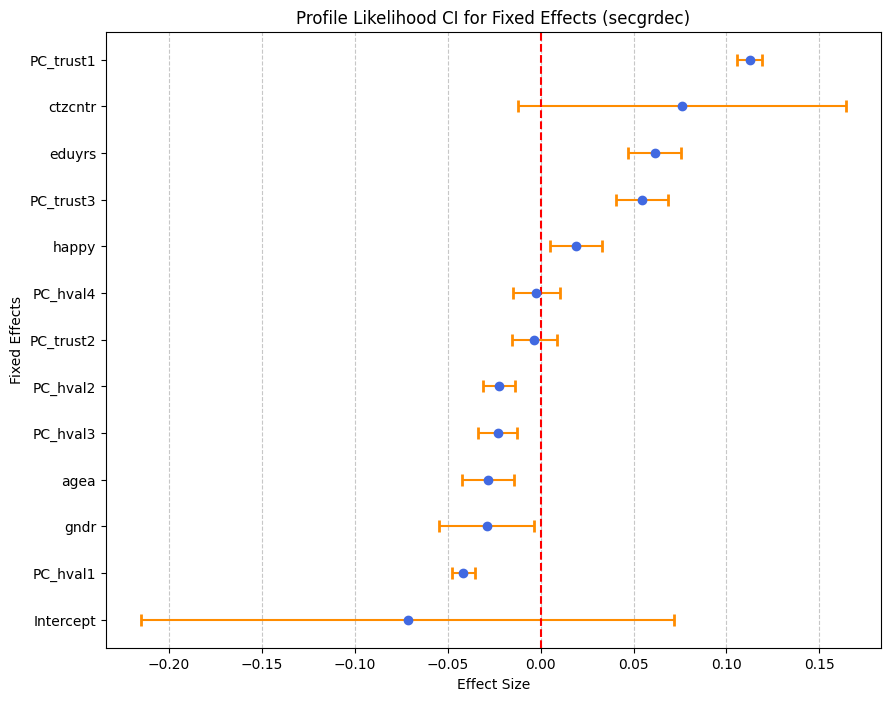

In [244]:
# Extract fixed effects confidence intervals
fixed_ci = mixed_results_secgrdec.conf_int()
fixed_effects = mixed_results_secgrdec.fe_params  # Fixed effects estimates

# Combine into a DataFrame for visualization
ci_df = fixed_ci.copy()
ci_df.columns = ['Lower', 'Upper']
ci_df['Estimate'] = fixed_effects
ci_df = ci_df.reset_index().rename(columns={'index': 'Parameter'})
ci_df = ci_df[~ci_df['Parameter'].str.contains('Group')]  # Exclude Group Var

ci_df = ci_df.sort_values(by='Estimate')

# Plot the forest plot
plt.figure(figsize=(10, 8))
plt.errorbar(ci_df['Estimate'], ci_df['Parameter'],
             xerr=[ci_df['Estimate'] - ci_df['Lower'],
                   ci_df['Upper'] - ci_df['Estimate']],
             fmt='o', color='royalblue', ecolor='darkorange', capsize=4, capthick=2)

# Add reference line at 0
plt.axvline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Profile Likelihood CI for Fixed Effects (secgrdec)')
plt.xlabel('Effect Size')
plt.ylabel('Fixed Effects')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [245]:
# Model for 'scidecpb'
formula_scidecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_scidecpb = smf.mixedlm(formula_scidecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_scidecpb = mixed_model_scidecpb.fit()


# Fit the fixed-effects model
fixed_model_scidecpb = smf.ols(formula_scidecpb, data=mixed_effects_data).fit()

LLF1 = fixed_model_scidecpb.llf  # log-likelihood of fixed-effects model
LLF2 = mixed_results_scidecpb.llf  # log-likelihood of mixed-effects model

# Degrees of freedom difference (1 for random intercept)
df_diff = 1
likelihood_ratio = -2 * (LLF1 - LLF2)
p_value = chi2.sf(likelihood_ratio, df_diff)

print(f"Likelihood Ratio Test for scidecpb: Chi2 = {likelihood_ratio:.4f}, p = {p_value:.4f}")

Likelihood Ratio Test for scidecpb: Chi2 = 793.6639, p = 0.0000


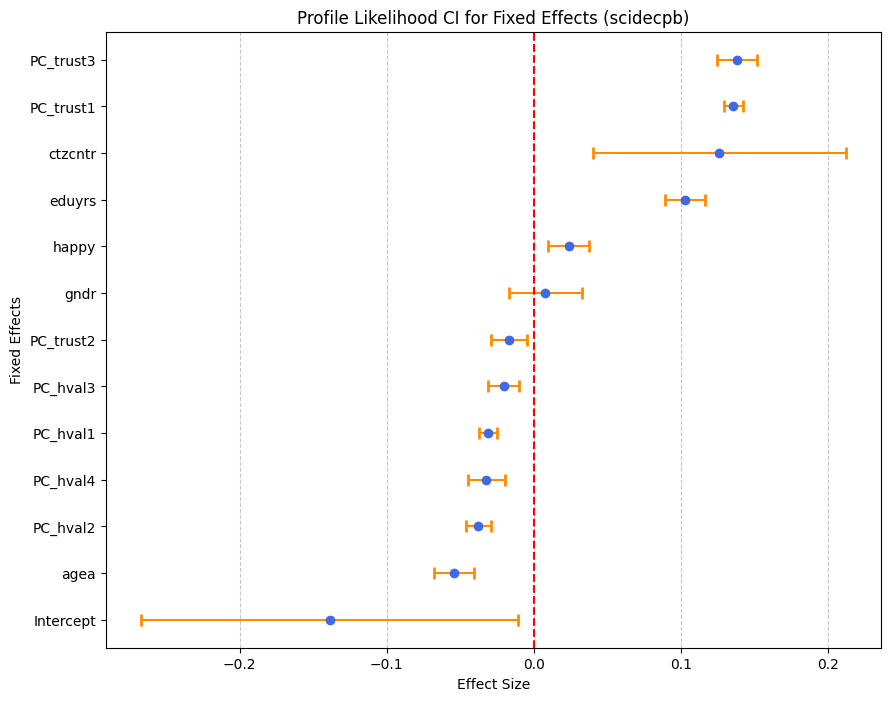

In [246]:
# Extract fixed effects confidence intervals
fixed_ci = mixed_results_scidecpb.conf_int()
fixed_effects = mixed_results_scidecpb.fe_params  # Fixed effects estimates

# Combine into a DataFrame for visualization
ci_df = fixed_ci.copy()
ci_df.columns = ['Lower', 'Upper']
ci_df['Estimate'] = fixed_effects
ci_df = ci_df.reset_index().rename(columns={'index': 'Parameter'})
ci_df = ci_df[~ci_df['Parameter'].str.contains('Group')]  # Exclude Group Var

ci_df = ci_df.sort_values(by='Estimate')

# Plot the dotplot
plt.figure(figsize=(10, 8))
plt.errorbar(ci_df['Estimate'], ci_df['Parameter'],
             xerr=[ci_df['Estimate'] - ci_df['Lower'],
                   ci_df['Upper'] - ci_df['Estimate']],
             fmt='o', color='royalblue', ecolor='darkorange', capsize=4, capthick=2)

# Add reference line at 0
plt.axvline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Profile Likelihood CI for Fixed Effects (scidecpb)')
plt.xlabel('Effect Size')
plt.ylabel('Fixed Effects')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

MICE DF

In [247]:
X_vars = PC_human_val + PC_trust_var + control_vars # fixed effects

# Prepare the dataframe
mixed_effects_data = df_with_pca_mice[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()


# Fit the fixed-effects model
fixed_model_secgrdec = smf.ols(formula_secgrdec, data=mixed_effects_data).fit()

# Likelihood ratio test
LLF1 = fixed_model_secgrdec.llf  # log-likelihood of fixed-effects model
LLF2 = mixed_results_secgrdec.llf  # log-likelihood of mixed-effects model

# Degrees of freedom difference (1 for random intercept)
df_diff = 1
likelihood_ratio = -2 * (LLF1 - LLF2)
p_value = chi2.sf(likelihood_ratio, df_diff)

print(f"Likelihood Ratio Test for secgrdec (MICE): Chi2 = {likelihood_ratio:.4f}, p = {p_value:.4f}")


Likelihood Ratio Test for secgrdec (MICE): Chi2 = 1431.6764, p = 0.0000


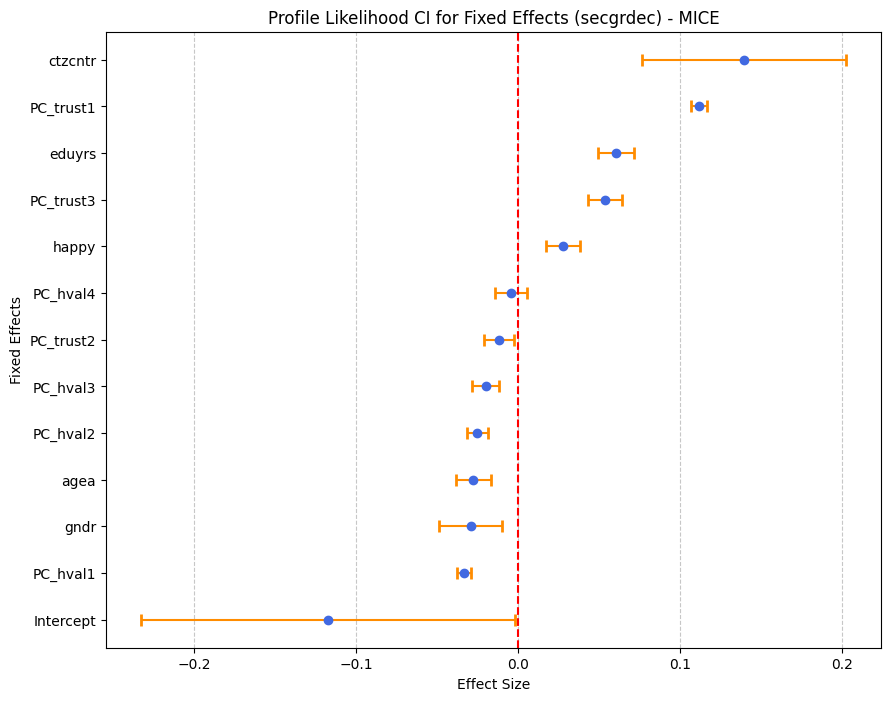

In [248]:
# Extract fixed effects confidence intervals
fixed_ci = mixed_results_secgrdec.conf_int()
fixed_effects = mixed_results_secgrdec.fe_params  # Fixed effects estimates

# Combine into a DataFrame for visualization
ci_df = fixed_ci.copy()
ci_df.columns = ['Lower', 'Upper']
ci_df['Estimate'] = fixed_effects
ci_df = ci_df.reset_index().rename(columns={'index': 'Parameter'})
ci_df = ci_df[~ci_df['Parameter'].str.contains('Group')]  # Exclude Group Var

ci_df = ci_df.sort_values(by='Estimate')

# Plot the dotplot
plt.figure(figsize=(10, 8))
plt.errorbar(ci_df['Estimate'], ci_df['Parameter'],
             xerr=[ci_df['Estimate'] - ci_df['Lower'],
                   ci_df['Upper'] - ci_df['Estimate']],
             fmt='o', color='royalblue', ecolor='darkorange', capsize=4, capthick=2)

# Add reference line at 0
plt.axvline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Profile Likelihood CI for Fixed Effects (secgrdec) - MICE')
plt.xlabel('Effect Size')
plt.ylabel('Fixed Effects')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [249]:
# Model for 'scidecpb'
formula_scidecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_scidecpb = smf.mixedlm(formula_scidecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_scidecpb = mixed_model_scidecpb.fit()


# Fit the fixed-effects model
fixed_model_scidecpb = smf.ols(formula_scidecpb, data=mixed_effects_data).fit()

LLF1 = fixed_model_scidecpb.llf  # log-likelihood of fixed-effects model
LLF2 = mixed_results_scidecpb.llf  # log-likelihood of mixed-effects model

# Degrees of freedom difference (1 for random intercept)
df_diff = 1
likelihood_ratio = -2 * (LLF1 - LLF2)
p_value = chi2.sf(likelihood_ratio, df_diff)

print(f"Likelihood Ratio Test for scidecpb (MICE): Chi2 = {likelihood_ratio:.4f}, p = {p_value:.4f}")

Likelihood Ratio Test for scidecpb (MICE): Chi2 = 1185.9753, p = 0.0000


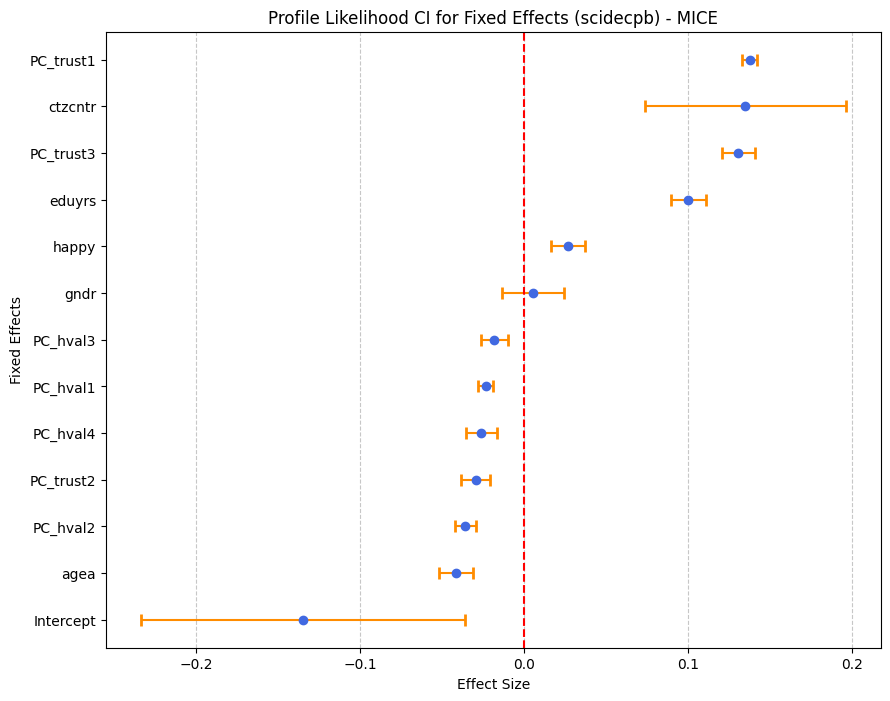

In [250]:
# Extract fixed effects confidence intervals
fixed_ci = mixed_results_scidecpb.conf_int()
fixed_effects = mixed_results_scidecpb.fe_params  # Fixed effects estimates

# Combine into a DataFrame for visualization
ci_df = fixed_ci.copy()
ci_df.columns = ['Lower', 'Upper']
ci_df['Estimate'] = fixed_effects
ci_df = ci_df.reset_index().rename(columns={'index': 'Parameter'})
ci_df = ci_df[~ci_df['Parameter'].str.contains('Group')]  # Exclude Group Var

ci_df = ci_df.sort_values(by='Estimate')

# Plot the dotplot
plt.figure(figsize=(10, 8))
plt.errorbar(ci_df['Estimate'], ci_df['Parameter'],
             xerr=[ci_df['Estimate'] - ci_df['Lower'],
                   ci_df['Upper'] - ci_df['Estimate']],
             fmt='o', color='royalblue', ecolor='darkorange', capsize=4, capthick=2)

# Add reference line at 0
plt.axvline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Profile Likelihood CI for Fixed Effects (scidecpb) - MICE')
plt.xlabel('Effect Size')
plt.ylabel('Fixed Effects')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Chi² values are high (more for MICE), with p-value << 0.05, meaning that modelling the random effects of countries improves model fit

#### Dotplot

NA-dropped DF

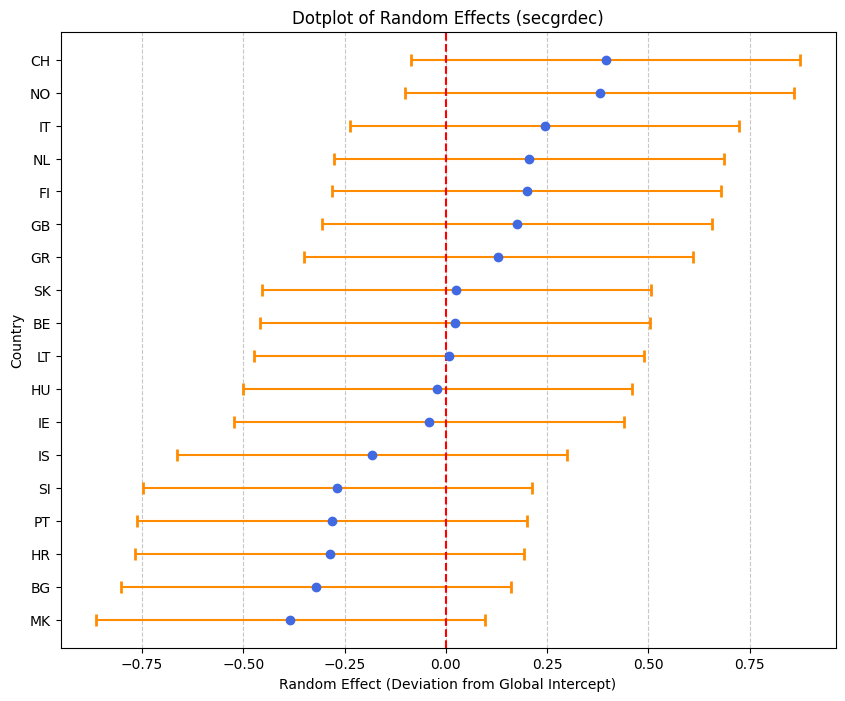

In [251]:
# secgrdec

# Prepare the dataframe
mixed_effects_data = df_with_pca[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()

# Extract random effects
random_effects = mixed_results_secgrdec.random_effects
re_df = pd.DataFrame({
    'Country': random_effects.keys(),
    'Country_Effect': [v['Group'] for v in random_effects.values()]  # Extract actual country effect values
})

# Get standard error for the random intercept (only 1 value for all countries)
re_se = mixed_results_secgrdec.cov_re.iloc[0, 0]**0.5  # Get the square root of the variance
re_df['se'] = re_se  # Assign the same SE to every country

# Calculate 95% confidence intervals
re_df['lower'] = re_df['Country_Effect'] - 1.96 * re_df['se']
re_df['upper'] = re_df['Country_Effect'] + 1.96 * re_df['se']

# Sort countries by random effects
re_df = re_df.sort_values(by='Country_Effect')

# Plot the dotplot
plt.figure(figsize=(10, 8))
plt.errorbar(re_df['Country_Effect'], re_df['Country'],
             xerr=[re_df['Country_Effect'] - re_df['lower'],
                   re_df['upper'] - re_df['Country_Effect']],
             fmt='o', color='royalblue', ecolor='darkorange', capsize=4, capthick=2)
plt.axvline(0, color='red', linestyle='--')
plt.title('Dotplot of Random Effects (secgrdec)')
plt.xlabel('Random Effect (Deviation from Global Intercept)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


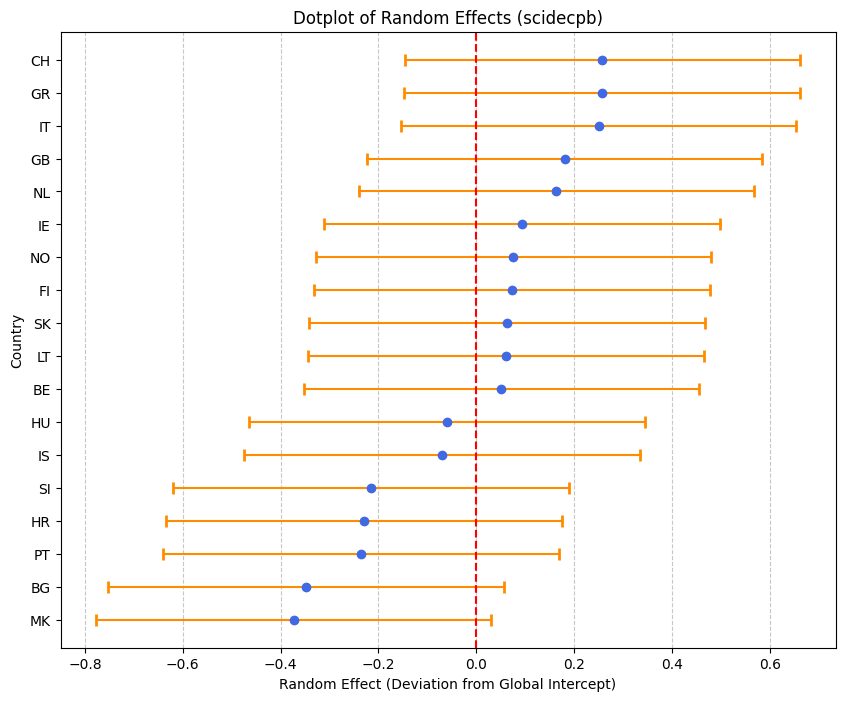

In [252]:
# scidecpb

# Prepare the dataframe
mixed_effects_data = df_with_pca[y_vars + X_vars + [group_var]]

# Model for 'scidecpb'
formula_scidecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_scidecpb = smf.mixedlm(formula_scidecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_scidecpb = mixed_model_scidecpb.fit()

# Extract random effects
random_effects = mixed_results_scidecpb.random_effects
re_df = pd.DataFrame({
    'Country': random_effects.keys(),
    'Country_Effect': [v['Group'] for v in random_effects.values()]  # Extract actual country effect values
})

# Get standard error for the random intercept (only 1 value for all countries)
re_se = mixed_results_scidecpb.cov_re.iloc[0, 0]**0.5  # Get the square root of the variance
re_df['se'] = re_se  # Assign the same SE to every country

# Calculate 95% confidence intervals
re_df['lower'] = re_df['Country_Effect'] - 1.96 * re_df['se']
re_df['upper'] = re_df['Country_Effect'] + 1.96 * re_df['se']

# Sort countries by random effects
re_df = re_df.sort_values(by='Country_Effect')

# Plot the dotplot
plt.figure(figsize=(10, 8))
plt.errorbar(re_df['Country_Effect'], re_df['Country'],
             xerr=[re_df['Country_Effect'] - re_df['lower'],
                   re_df['upper'] - re_df['Country_Effect']],
             fmt='o', color='royalblue', ecolor='darkorange', capsize=4, capthick=2)
plt.axvline(0, color='red', linestyle='--')
plt.title('Dotplot of Random Effects (scidecpb)')
plt.xlabel('Random Effect (Deviation from Global Intercept)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


MICE DF

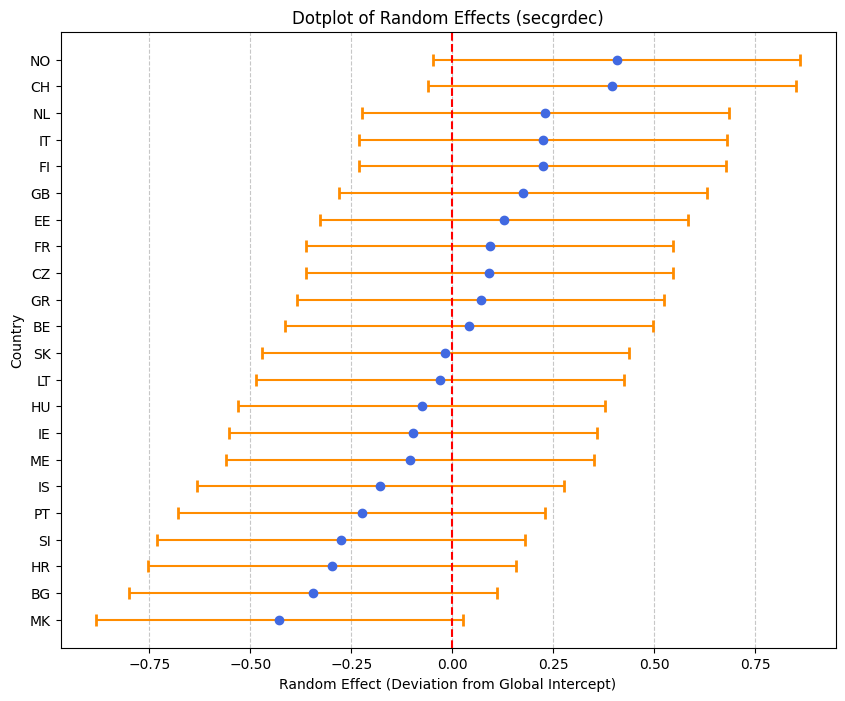

In [253]:
# secgrdec

# Prepare the dataframe
mixed_effects_data = df_with_pca_mice[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()

# Extract random effects
random_effects = mixed_results_secgrdec.random_effects
re_df = pd.DataFrame({
    'Country': random_effects.keys(),
    'Country_Effect': [v['Group'] for v in random_effects.values()]  # Extract actual country effect values
})

# Get standard error for the random intercept (only 1 value for all countries)
re_se = mixed_results_secgrdec.cov_re.iloc[0, 0]**0.5  # Get the square root of the variance
re_df['se'] = re_se  # Assign the same SE to every country

# Calculate 95% confidence intervals
re_df['lower'] = re_df['Country_Effect'] - 1.96 * re_df['se']
re_df['upper'] = re_df['Country_Effect'] + 1.96 * re_df['se']

# Sort countries by random effects
re_df = re_df.sort_values(by='Country_Effect')

# Plot the dotplot
plt.figure(figsize=(10, 8))
plt.errorbar(re_df['Country_Effect'], re_df['Country'],
             xerr=[re_df['Country_Effect'] - re_df['lower'],
                   re_df['upper'] - re_df['Country_Effect']],
             fmt='o', color='royalblue', ecolor='darkorange', capsize=4, capthick=2)
plt.axvline(0, color='red', linestyle='--')
plt.title('Dotplot of Random Effects (secgrdec)')
plt.xlabel('Random Effect (Deviation from Global Intercept)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


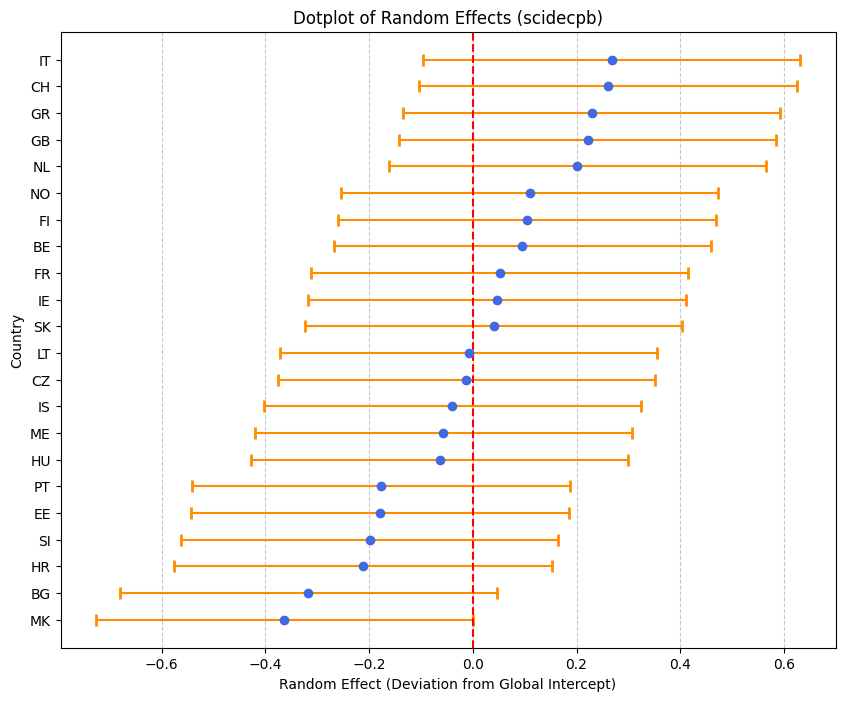

In [254]:
# scidecpb

# Prepare the dataframe
mixed_effects_data = df_with_pca_mice[y_vars + X_vars + [group_var]]

# Model for 'scidecpb'
formula_scidecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_scidecpb = smf.mixedlm(formula_scidecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_scidecpb = mixed_model_scidecpb.fit()

# Extract random effects
random_effects = mixed_results_scidecpb.random_effects
re_df = pd.DataFrame({
    'Country': random_effects.keys(),
    'Country_Effect': [v['Group'] for v in random_effects.values()]  # Extract actual country effect values
})

# Get standard error for the random intercept (only 1 value for all countries)
re_se = mixed_results_scidecpb.cov_re.iloc[0, 0]**0.5  # Get the square root of the variance
re_df['se'] = re_se  # Assign the same SE to every country

# Calculate 95% confidence intervals
re_df['lower'] = re_df['Country_Effect'] - 1.96 * re_df['se']
re_df['upper'] = re_df['Country_Effect'] + 1.96 * re_df['se']

# Sort countries by random effects
re_df = re_df.sort_values(by='Country_Effect')

# Plot the dotplot
plt.figure(figsize=(10, 8))
plt.errorbar(re_df['Country_Effect'], re_df['Country'],
             xerr=[re_df['Country_Effect'] - re_df['lower'],
                   re_df['upper'] - re_df['Country_Effect']],
             fmt='o', color='royalblue', ecolor='darkorange', capsize=4, capthick=2)
plt.axvline(0, color='red', linestyle='--')
plt.title('Dotplot of Random Effects (scidecpb)')
plt.xlabel('Random Effect (Deviation from Global Intercept)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Assessing Assumptions

#### NA-dropped DF

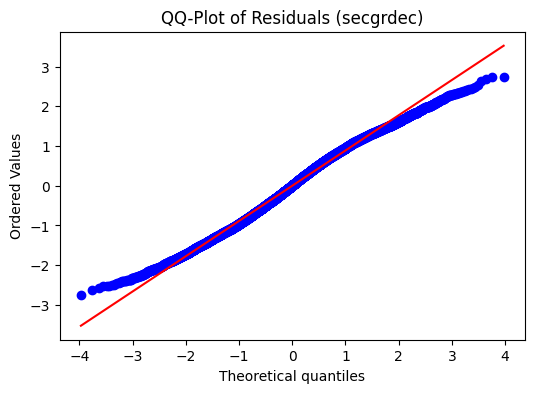

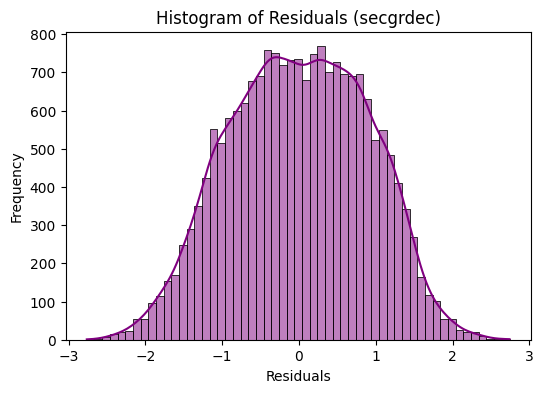

In [291]:
# secgrdec

# Prepare the dataframe
mixed_effects_data = df_with_pca[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()

# Extract residuals and fitted values
residuals = mixed_results_secgrdec.resid
fitted = mixed_results_secgrdec.fittedvalues

# Extract random effects
random_effects = mixed_results_secgrdec.random_effects
re_df = pd.DataFrame({
    'Group': random_effects.keys(),
    'Random_Effect': [v['Group'] for v in random_effects.values()]
})

# # 1. Linearity: Residuals vs Fitted Values
# plt.figure(figsize=(6, 4))
# sns.scatterplot(x=fitted, y=residuals, color='royalblue')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Linearity Check: Residuals vs Fitted Values (secgrdec)')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.show()
# print()

# Normality of Residuals: QQ-Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals (secgrdec)')
plt.show()
print()

# # 3. Homoscedasticity: Residuals vs Fitted Values
# plt.figure(figsize=(6, 4))
# sns.scatterplot(x=fitted, y=residuals, color='teal')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Homoscedasticity Check: Residuals vs Fitted Values (secgrdec)')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.show()
# print()

# 4. Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Histogram of Residuals (secgrdec)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print()


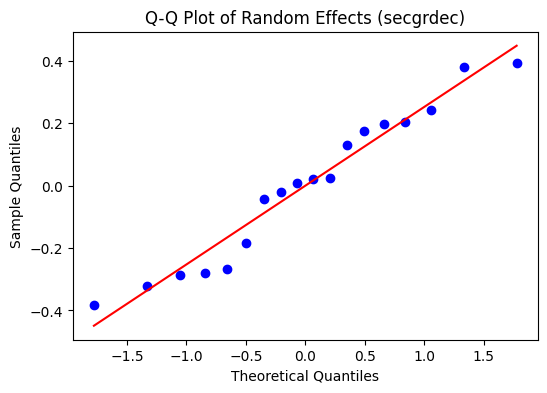

In [256]:
# Extract random effects for the Group
random_effects = mixed_results_secgrdec.random_effects
re_values = [v['Group'] for v in random_effects.values()]  # Flatten values

# Q-Q Plot for Random Effects
plt.figure(figsize=(6, 4))
stats.probplot(re_values, dist="norm", plot=plt)
plt.title('Q-Q Plot of Random Effects (secgrdec)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

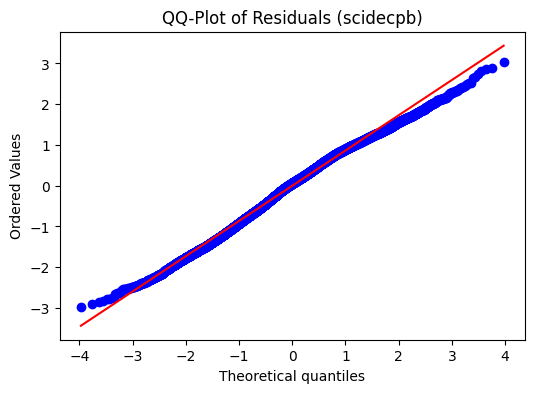

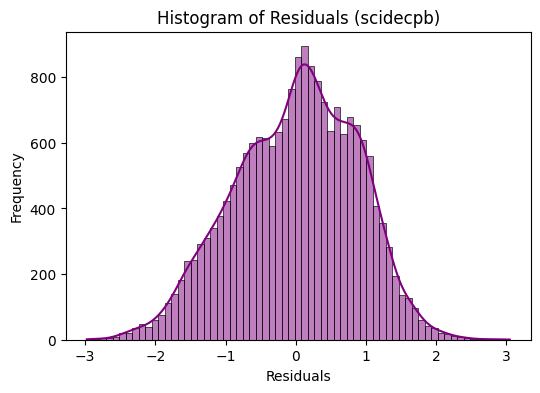

In [292]:
# scidecpb

# Prepare the dataframe
mixed_effects_data = df_with_pca[y_vars + X_vars + [group_var]]

# Model for 'scidecpb'
formula_scidecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_scidecpb = smf.mixedlm(formula_scidecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_scidecpb = mixed_model_scidecpb.fit()


# Extract residuals and fitted values
residuals = mixed_results_scidecpb.resid
fitted = mixed_results_scidecpb.fittedvalues

# Extract random effects
random_effects = mixed_results_scidecpb.random_effects
re_df = pd.DataFrame({
    'Group': random_effects.keys(),
    'Random_Effect': [v['Group'] for v in random_effects.values()]
})


#  Normality of Residuals: QQ-Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals (scidecpb)')
plt.show()
print()


# Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Histogram of Residuals (scidecpb)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print()



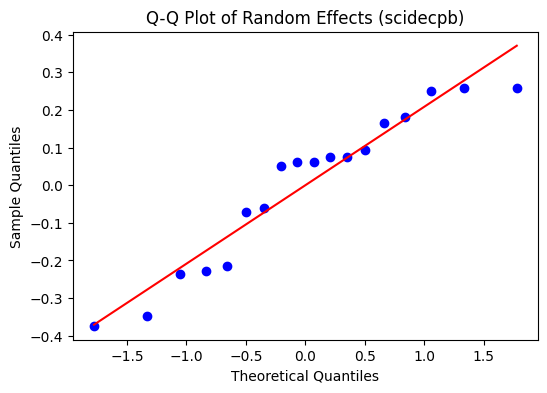

In [258]:
# Extract random effects for the Group
random_effects = mixed_results_scidecpb.random_effects
re_values = [v['Group'] for v in random_effects.values()]  # Flatten values

# Q-Q Plot for Random Effects
plt.figure(figsize=(6, 4))
stats.probplot(re_values, dist="norm", plot=plt)
plt.title('Q-Q Plot of Random Effects (scidecpb)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#### DF MICE

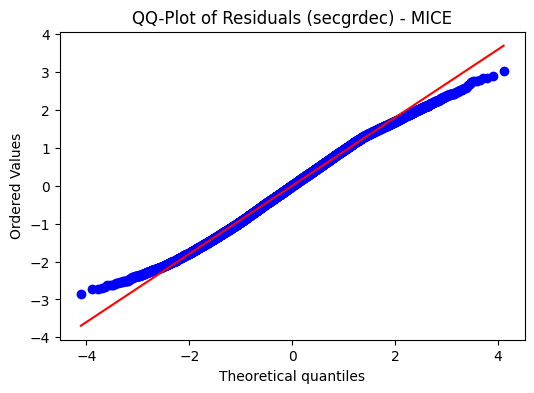

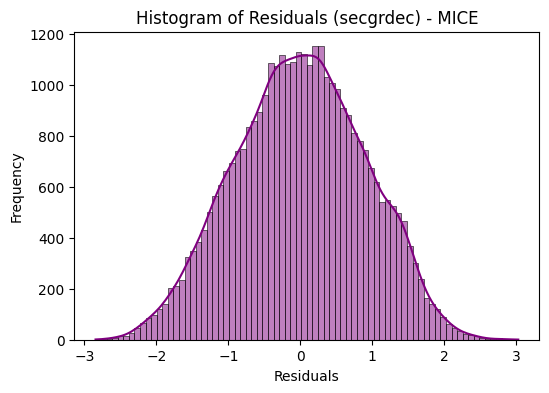

In [293]:
# secgrdec

# Prepare the dataframe
mixed_effects_data = df_with_pca_mice[y_vars + X_vars + [group_var]]

# Model for 'secgrdec'
formula_secgrdec = 'secgrdec ~ ' + ' + '.join(X_vars)
mixed_model_secgrdec = smf.mixedlm(formula_secgrdec, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_secgrdec = mixed_model_secgrdec.fit()

# Extract residuals and fitted values
residuals = mixed_results_secgrdec.resid
fitted = mixed_results_secgrdec.fittedvalues

# Extract random effects
random_effects = mixed_results_secgrdec.random_effects
re_df = pd.DataFrame({
    'Group': random_effects.keys(),
    'Random_Effect': [v['Group'] for v in random_effects.values()]
})



# Normality of Residuals: QQ-Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals (secgrdec) - MICE')
plt.show()
print()



# Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Histogram of Residuals (secgrdec) - MICE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print()




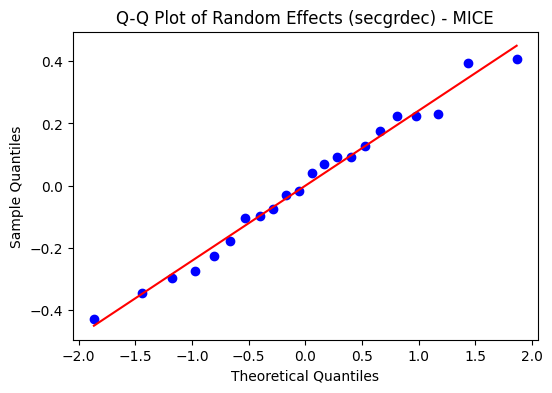

In [260]:
# Extract random effects for the Group
random_effects = mixed_results_secgrdec.random_effects
re_values = [v['Group'] for v in random_effects.values()]  # Flatten values

# Q-Q Plot for Random Effects
plt.figure(figsize=(6, 4))
stats.probplot(re_values, dist="norm", plot=plt)
plt.title('Q-Q Plot of Random Effects (secgrdec) - MICE')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

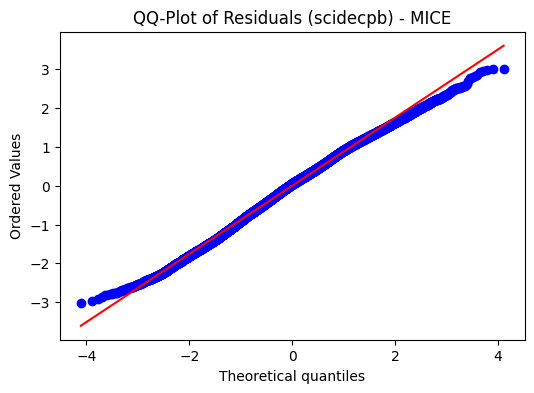

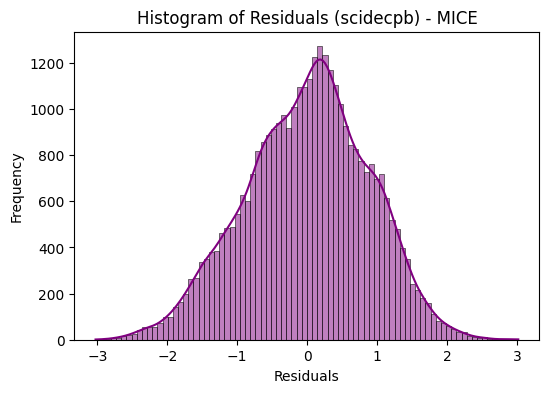

In [294]:
# scidecpb

# Prepare the dataframe
mixed_effects_data = df_with_pca_mice[y_vars + X_vars + [group_var]]

# Model for 'scidecpb'
formula_scidecpb = 'scidecpb ~ ' + ' + '.join(X_vars)
mixed_model_scidecpb = smf.mixedlm(formula_scidecpb, data=mixed_effects_data, groups=mixed_effects_data[group_var])
mixed_results_scidecpb = mixed_model_scidecpb.fit()


# Extract residuals and fitted values
residuals = mixed_results_scidecpb.resid
fitted = mixed_results_scidecpb.fittedvalues

# Extract random effects
random_effects = mixed_results_scidecpb.random_effects
re_df = pd.DataFrame({
    'Group': random_effects.keys(),
    'Random_Effect': [v['Group'] for v in random_effects.values()]
})


#Normality of Residuals: QQ-Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals (scidecpb) - MICE')
plt.show()
print()

# Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Histogram of Residuals (scidecpb) - MICE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print()



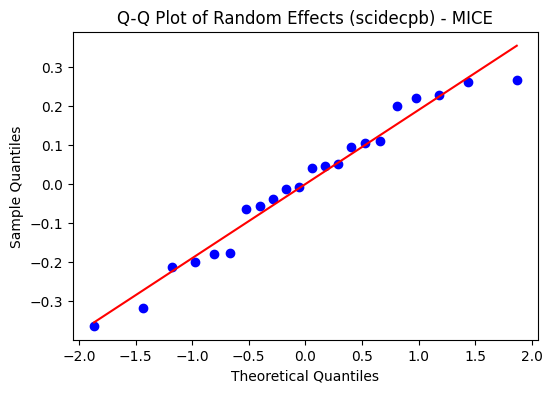

In [262]:
# Extract random effects for the Group
random_effects = mixed_results_scidecpb.random_effects
re_values = [v['Group'] for v in random_effects.values()]  # Flatten values

# Q-Q Plot for Random Effects
plt.figure(figsize=(6, 4))
stats.probplot(re_values, dist="norm", plot=plt)
plt.title('Q-Q Plot of Random Effects (scidecpb) - MICE')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()